# EXPLORATORY NOTEBOOK

In [1]:
#python libraries
import pandas as pd
import numpy as np
import os

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Import homemade files
from env import hostname, user, password
import wrangle as w
# import explore as e

# Import scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import for modeling 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

# Import for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer
# Import for feature selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE




#turn of warnings 
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## ACQUIRE DATA - MODULES USED & DATA INTEGRITY MAINTAINED 
52,441 after joining all three required tables Properties_2017, Predictions_2017 and propertylandusetype with SFH "261"

In [2]:
df = w.get_zillow_data()
df.head(2)

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
0         4.0          3.5                        3100.0          1023282.0   
1         2.0          1.0                        1465.0           464000.0   

   yearbuilt    fips  lotsizesquarefeet    longitude    latitude  
0     1998.0  6059.0             4506.0 -117869207.0  33634931.0  
1     1967.0  6111.0            12647.0 -119281531.0  34449266.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   yearbuilt                     52325 non-null  float64
 5   fips                          52441 non-null  float64
 6   lotsizesquarefeet             52072 non-null  float64
 7   longitude                     52441 non-null  float64
 8   latitude                      52441 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [4]:
df.shape

(52441, 9)

In [5]:
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
lotsizesquarefeet               369
longitude                         0
latitude                          0
dtype: int64

In [6]:
#Explore correlation data by churn
df_correlation = df.corr()['taxvaluedollarcnt'].sort_values(ascending=False).apply(lambda x: "{:.2%}".format(x))
df_correlation

taxvaluedollarcnt               100.00%
calculatedfinishedsquarefeet     60.61%
bathroomcnt                      51.38%
bedroomcnt                       26.89%
yearbuilt                        17.05%
lotsizesquarefeet                 3.12%
fips                              2.26%
longitude                        -3.56%
latitude                        -11.94%
Name: taxvaluedollarcnt, dtype: object

## PREPARE DATA - MODULES CREATED FOR WRANGLING

In [7]:
# Prepared data by renamed columns to enhance readability. Dropped null values & duplicates.
df = w.prep_zillow(df)
df.head()

bedrooms  bathrooms    sqft  tax_value  year_built  county  lot_size  \
0       4.0        3.5  3100.0  1023282.0      1998.0  6059.0    4506.0   
1       2.0        1.0  1465.0   464000.0      1967.0  6111.0   12647.0   
2       3.0        2.0  1243.0   564778.0      1962.0  6059.0    8432.0   
3       4.0        3.0  2376.0   145143.0      1970.0  6037.0   13038.0   
4       4.0        3.0  2962.0   773303.0      1950.0  6037.0   63000.0   

     longitude    latitude  
0 -117869207.0  33634931.0  
1 -119281531.0  34449266.0  
2 -117823170.0  33886168.0  
3 -118240722.0  34245180.0  
4 -118179824.0  34145202.0

## MISSING VALUES ADDRESSED

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51842 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51842 non-null  float64
 1   bathrooms   51842 non-null  float64
 2   sqft        51842 non-null  float64
 3   tax_value   51842 non-null  float64
 4   year_built  51842 non-null  float64
 5   county      51842 non-null  float64
 6   lot_size    51842 non-null  float64
 7   longitude   51842 non-null  float64
 8   latitude    51842 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [9]:
df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
county        0
lot_size      0
longitude     0
latitude      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51842 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    51842 non-null  float64
 1   bathrooms   51842 non-null  float64
 2   sqft        51842 non-null  float64
 3   tax_value   51842 non-null  float64
 4   year_built  51842 non-null  float64
 5   county      51842 non-null  float64
 6   lot_size    51842 non-null  float64
 7   longitude   51842 non-null  float64
 8   latitude    51842 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [11]:
df.shape

(51842, 9)

In [12]:
df.head()

bedrooms  bathrooms    sqft  tax_value  year_built  county  lot_size  \
0       4.0        3.5  3100.0  1023282.0      1998.0  6059.0    4506.0   
1       2.0        1.0  1465.0   464000.0      1967.0  6111.0   12647.0   
2       3.0        2.0  1243.0   564778.0      1962.0  6059.0    8432.0   
3       4.0        3.0  2376.0   145143.0      1970.0  6037.0   13038.0   
4       4.0        3.0  2962.0   773303.0      1950.0  6037.0   63000.0   

     longitude    latitude  
0 -117869207.0  33634931.0  
1 -119281531.0  34449266.0  
2 -117823170.0  33886168.0  
3 -118240722.0  34245180.0  
4 -118179824.0  34145202.0

In [13]:
df.bedrooms.value_counts()

3.0     23212
4.0     15083
2.0      8242
5.0      3910
6.0       626
1.0       577
7.0       103
0.0        54
8.0        24
9.0         8
10.0        2
11.0        1
Name: bedrooms, dtype: int64

In [14]:
#master clean renames fips to County, removes outliers for bedrooms, bathrooms, and sqft columns & changes data types integers
df = w.master_clean_zillow(df)
df.head()

bedrooms  bathrooms  sqft  tax_value year_built       county  lot_size  \
0         4          3  3100    1023282       1998   Orange Cty      4506   
1         2          1  1465     464000       1967      Ventura     12647   
2         3          2  1243     564778       1962   Orange Cty      8432   
3         4          3  2376     145143       1970  Los Angeles     13038   
4         4          3  2962     773303       1950  Los Angeles     63000   

   longitude  latitude  
0 -117869207  33634931  
1 -119281531  34449266  
2 -117823170  33886168  
3 -118240722  34245180  
4 -118179824  34145202

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50283 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bedrooms    50283 non-null  int64 
 1   bathrooms   50283 non-null  int64 
 2   sqft        50283 non-null  int64 
 3   tax_value   50283 non-null  int64 
 4   year_built  50283 non-null  object
 5   county      50283 non-null  object
 6   lot_size    50283 non-null  int64 
 7   longitude   50283 non-null  int64 
 8   latitude    50283 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.8+ MB


In [16]:
df.shape

(50283, 9)

In [17]:
df.bedrooms.value_counts()

3    22924
4    14629
2     8189
5     3500
1      565
6      476
Name: bedrooms, dtype: int64

In [18]:
df.bathrooms.value_counts()

2    25552
3    11173
1    10270
4     2470
5      691
6      127
Name: bathrooms, dtype: int64

In [19]:
df.lot_size.describe()

count    5.028300e+04
mean     1.078467e+04
std      8.740701e+04
min      2.360000e+02
25%      5.544500e+03
50%      6.775000e+03
75%      8.578000e+03
max      6.971010e+06
Name: lot_size, dtype: float64

In [20]:
df.sqft.describe()

count    50283.000000
mean      1842.036653
std        821.673467
min        152.000000
25%       1259.000000
50%       1634.000000
75%       2234.000000
max       8615.000000
Name: sqft, dtype: float64

#### <span style= 'color:green'> Outliers are sale_tax $40+ and any sqft above 8K

In [21]:
# Clean data devided by original data = percent of original data maintained after preparation and cleaning process 
50282/52441

0.9588299231517324

## SPLIT DATA - DATA SPLIT IS REPODUCIBLE

In [22]:
#Data split into train, validate, test using Random State of 123
train, validate, test = w.split_zillow(df)

Train shape: (30169, 9)
Validate shape: (10057, 9)
Test shape: (10057, 9)


In [23]:
train.dtypes

bedrooms       int64
bathrooms      int64
sqft           int64
tax_value      int64
year_built    object
county        object
lot_size       int64
longitude      int64
latitude       int64
dtype: object

In [24]:
train.head()

bedrooms  bathrooms  sqft  tax_value year_built       county  lot_size  \
2178          4          1  2499     338176       1953  Los Angeles    112751   
37565         4          1  1301      66016       1944  Los Angeles      5458   
48602         4          4  3789    1158000       1999      Ventura     13546   
41120         3          2  1352     564482       1928  Los Angeles      4799   
35722         3          2  1413     405145       1941  Los Angeles      6868   

       longitude  latitude  
2178  -118169467  34635282  
37565 -118138053  33866686  
48602 -118966992  34158979  
41120 -118364216  34142966  
35722 -118120842  33983891

In [25]:
# Datasets split into  50%, 30%, and 20% data previously cleaned so no missed values nulls and outliers removed
w.print_train(train, validate, test)

Train shape: (30169, 9)
Validate shape: (10057, 9)
Test shape: (10057, 9)


## INITIAL EXPLORATORY ANALYSIS

In [26]:
#This is a scatter plot that shows How the counties appear on a map using longitude and latitutde lines 
def california_county(train):
    fig, ax = plt.subplots(figsize = (7,5))
    sns.scatterplot(data=train,x=train['longitude'],
                y=train['latitude'], zorder=1,hue='county')
plt.show()

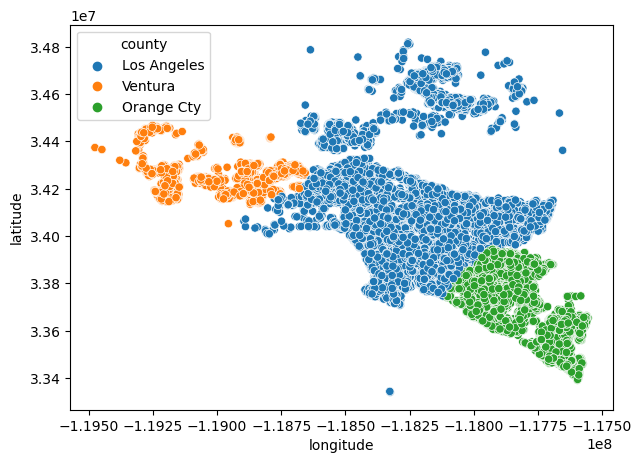

In [27]:
#plots the locations and makes a beautiful California Coast 
california_county(train)

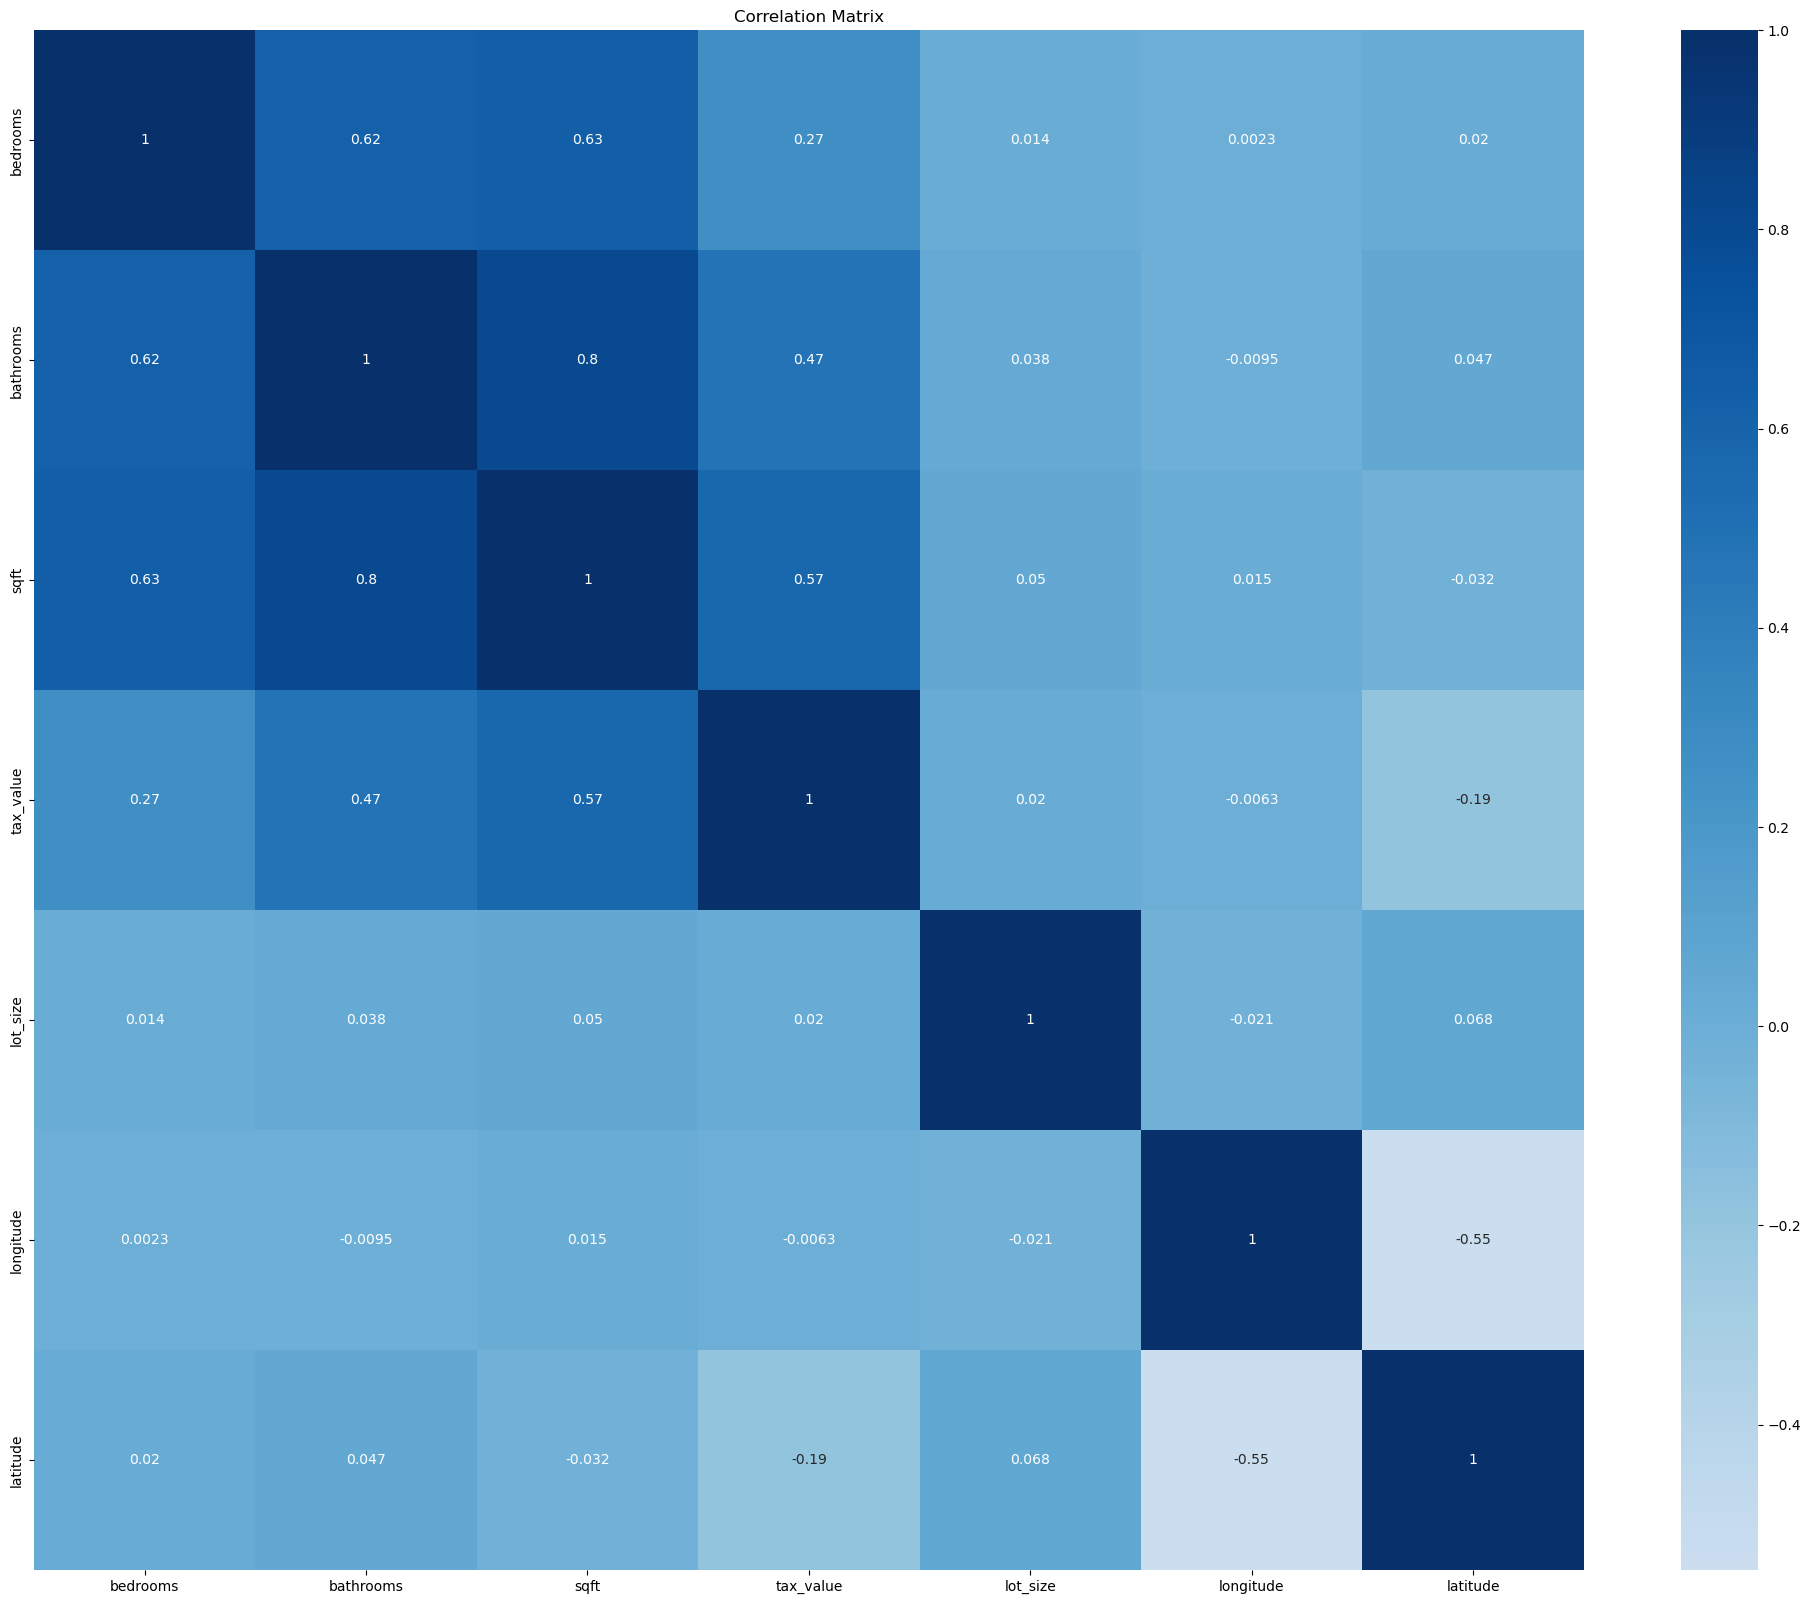

In [28]:
#Visualizing correlation data with Heat Map

plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(), cmap='Blues', center=0, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [29]:
#Explore correlation data by churn
train_correlation = train.corr().style.format("{:1.0%}")
train_correlation

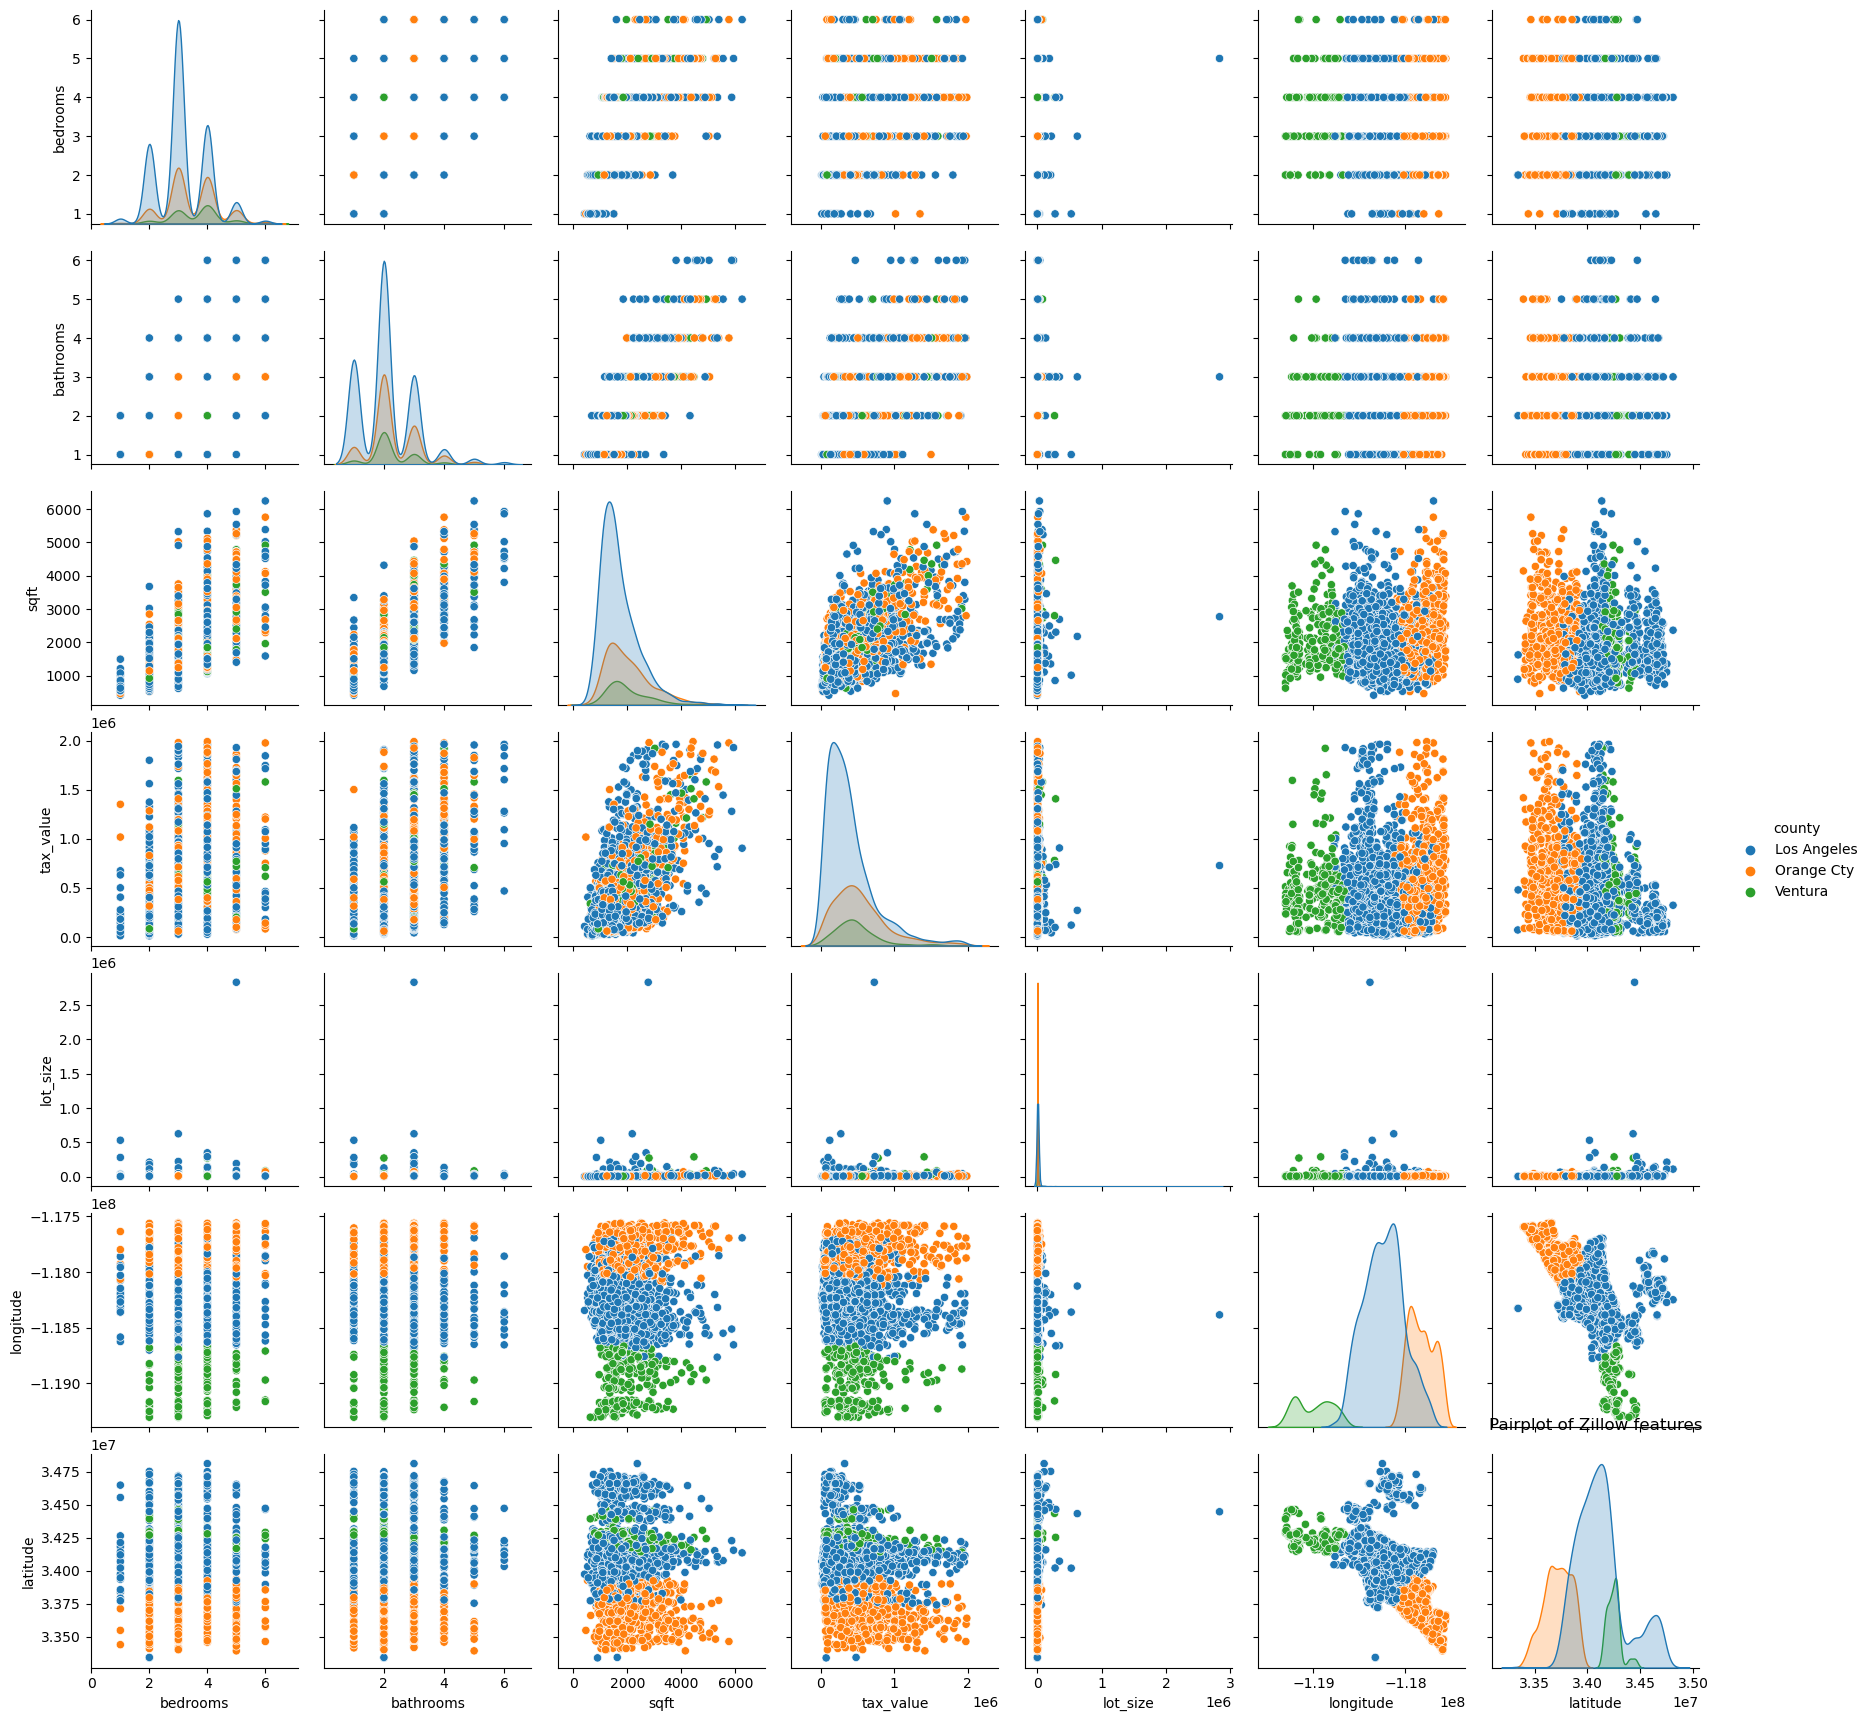

In [30]:
# Pairplot of features to determine which ones will best represent the data and questions asked?
train_sample = train.sample(n=3017)
sns.pairplot(train_sample, hue = 'county')
plt.title('Pairplot of Zillow features')
plt.show()

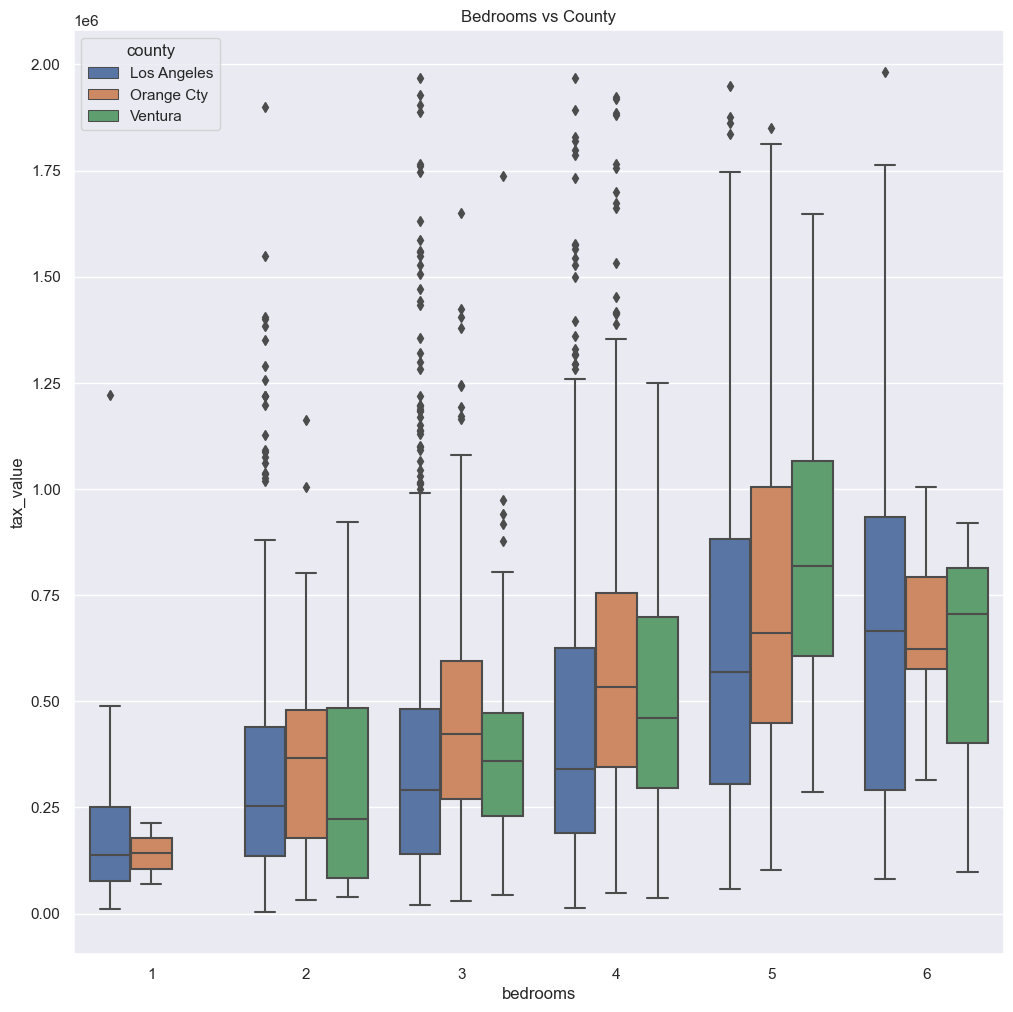

In [31]:
def bed_in_box(train):
    train_sample = train.sample(n=3017)
    features = ['bedrooms']
    
    for feature in features:
        sns.set(rc={'figure.figsize': (12, 12)})
        
        sns.boxplot(x=feature, y="tax_value", data=train_sample, hue='county')
        plt.title('Bedrooms vs County')
bed_in_box(train)

<Axes: xlabel='sqft', ylabel='tax_value'>

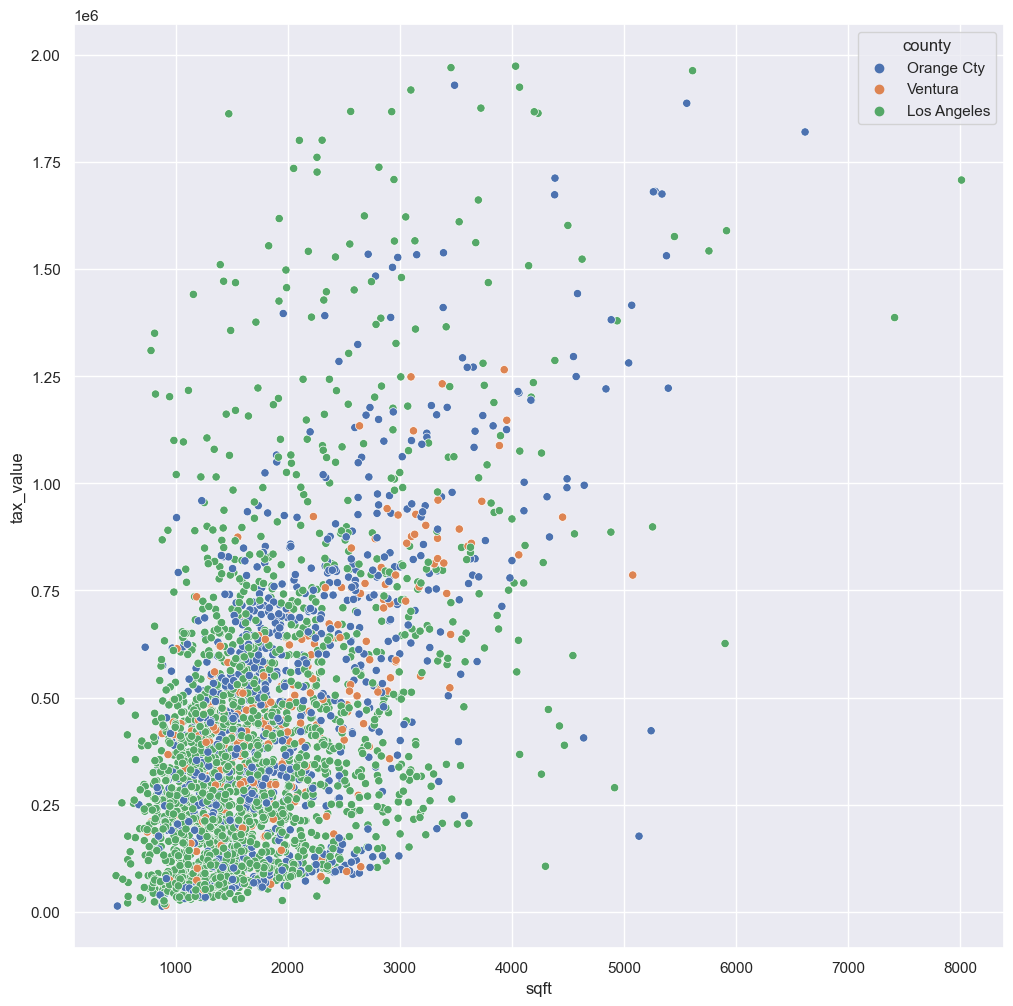

In [32]:
train_sample = train.sample(n=3017)
sns.scatterplot(x= 'sqft', y="tax_value", data=train_sample, hue = 'county')

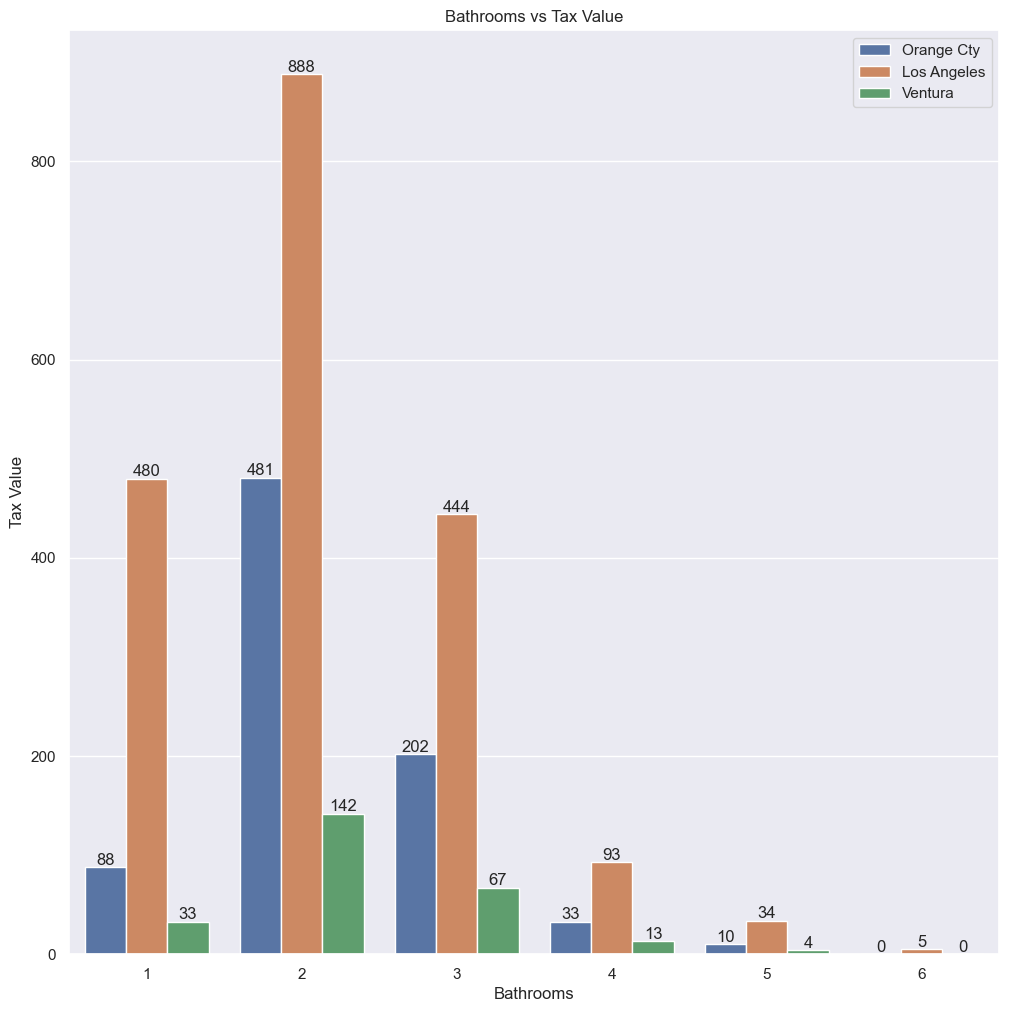

In [33]:
def bath_bar(train):    
    train_sample = train.sample(n=3017)
    # Visualizing bathrooms by county
    bath = sns.countplot(data=train_sample, x='bathrooms', hue='county')
    
    # Access the legend object
    legend = bath.legend()
    bath.set_xlabel('Bathrooms')
    bath.set_ylabel('Tax Value')
    plt.title('Bathrooms vs Tax Value')
                          
     # Add count numbers on bars
    for p in bath.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        bath.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
    plt.show()
bath_bar(train)

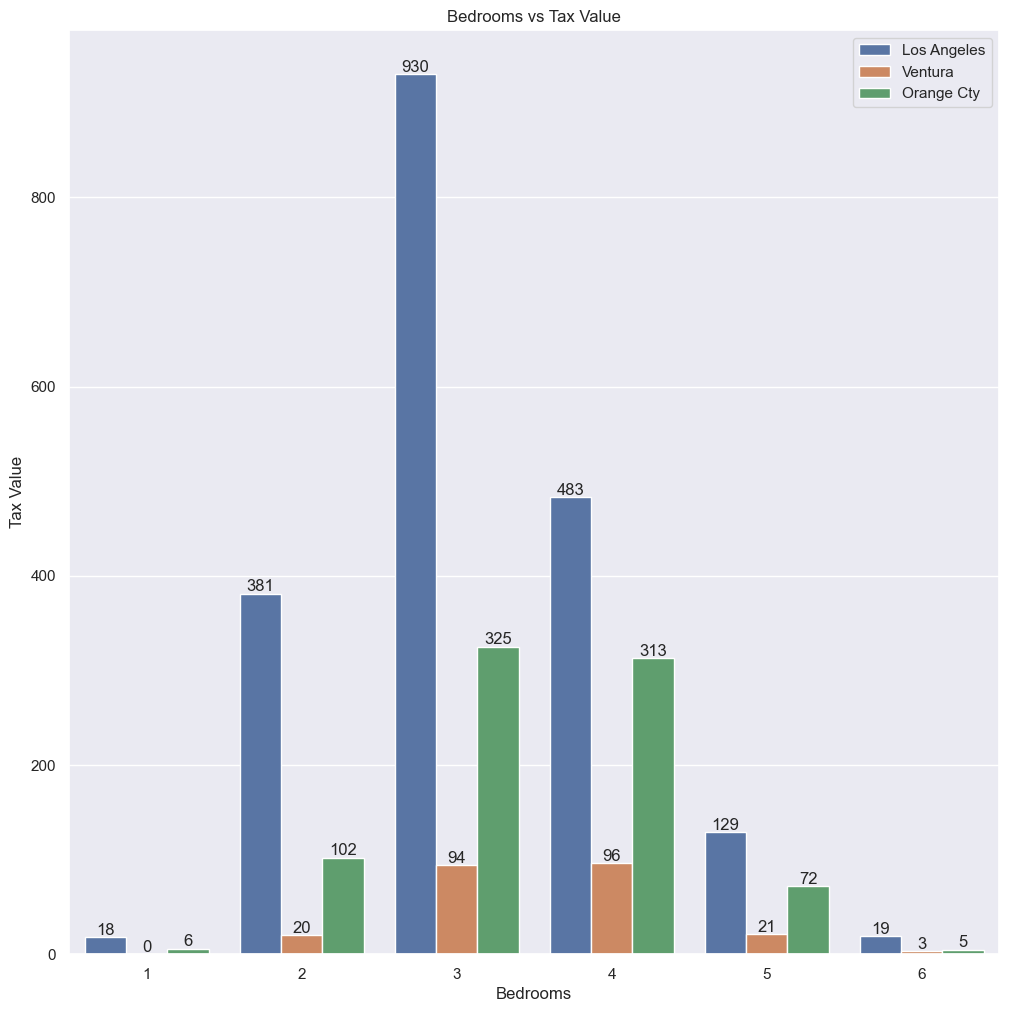

In [34]:
def bed_in_bar(train):
    train_sample = train.sample(n=3017)
    x = ['bedrooms']  # Assuming you want to display the count for the 'bedrooms' feature
    
    # Visualizing the bathrooms by county
    br = sns.countplot(data=train_sample, x='bedrooms', hue='county')
    
    # Access the legend object
    legend = br.legend()
    
    br.set_xlabel('Bedrooms')
    br.set_ylabel('Tax Value')
    plt.title('Bedrooms vs Tax Value')
    
    # Add count numbers on bars
    for p in br.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        br.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()
bed_in_bar(train)

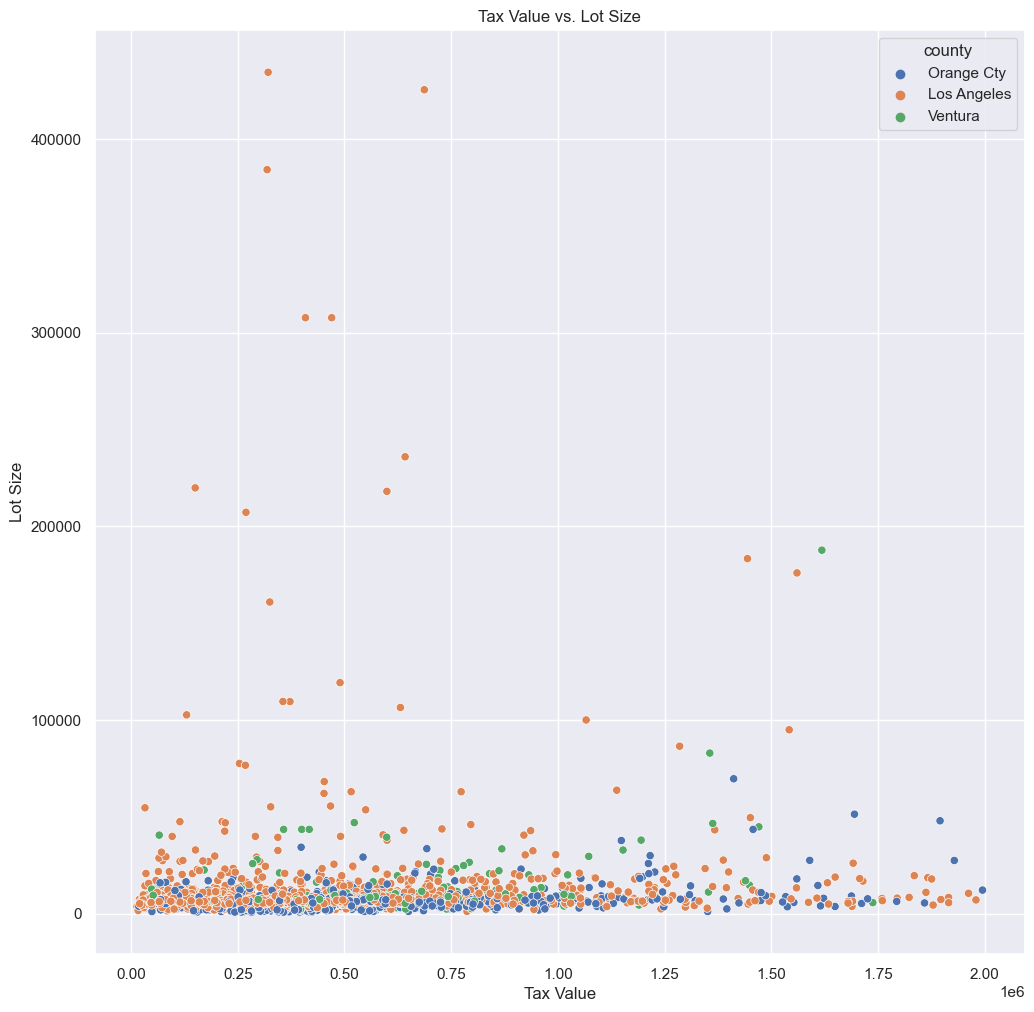

In [35]:
def lot_scat(train):
    sns.set(rc={'figure.figsize': (12, 12)})
    train_sample = train.sample(n=3017)
    sns.scatterplot(x='tax_value', y='lot_size', data=train_sample, hue='county')
    plt.xlabel('Tax Value')
    plt.ylabel('Lot Size')
    plt.title('Tax Value vs. Lot Size')
    plt.show()
lot_scat(train)

### EXPLORE TAKEAWAY 
<span style='color:green'> Sqft and bathrooms have more significant relationship to tax values than bedrooms and lotsizes 

In [36]:
train.head()

bedrooms  bathrooms  sqft  tax_value year_built       county  lot_size  \
2178          4          1  2499     338176       1953  Los Angeles    112751   
37565         4          1  1301      66016       1944  Los Angeles      5458   
48602         4          4  3789    1158000       1999      Ventura     13546   
41120         3          2  1352     564482       1928  Los Angeles      4799   
35722         3          2  1413     405145       1941  Los Angeles      6868   

       longitude  latitude  
2178  -118169467  34635282  
37565 -118138053  33866686  
48602 -118966992  34158979  
41120 -118364216  34142966  
35722 -118120842  33983891

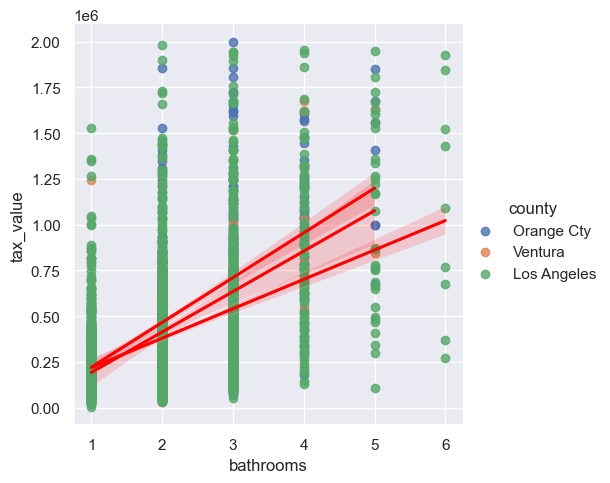

In [37]:
def plot_bath_pairs():
    train_sample = train.sample(n=3017)
    
    sns.lmplot(x='bathrooms', y='tax_value', data=train_sample, hue= 'county', line_kws={'color': 'red'})

plot_bath_pairs()  
    

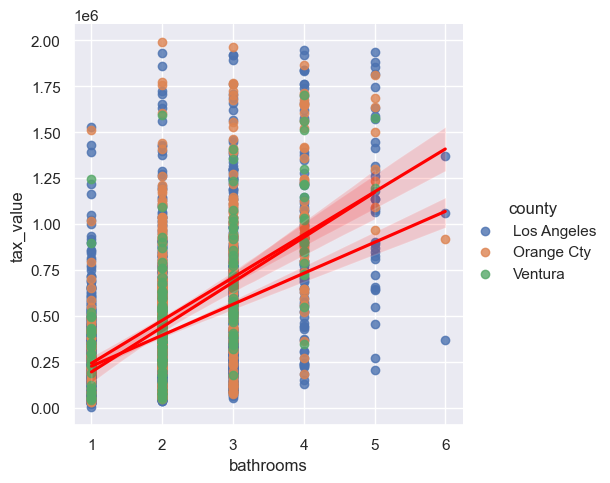

In [38]:
def plot_bath_pairs():
    train_sample = train.sample(n=3017)
    
    sns.lmplot(x='bathrooms', y='tax_value', data=train_sample, hue= 'county', line_kws={'color': 'red'})
plot_bath_pairs()

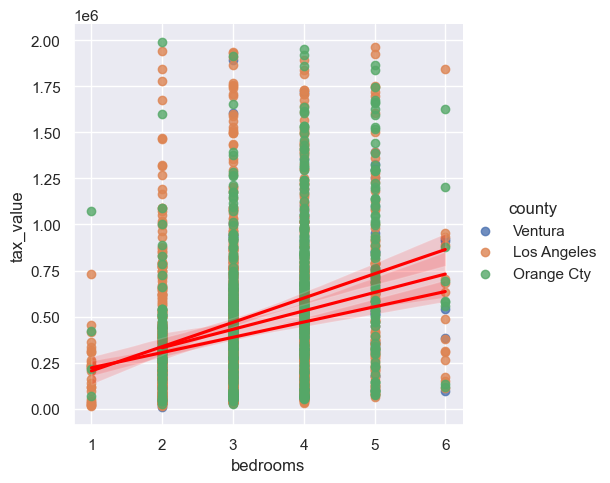

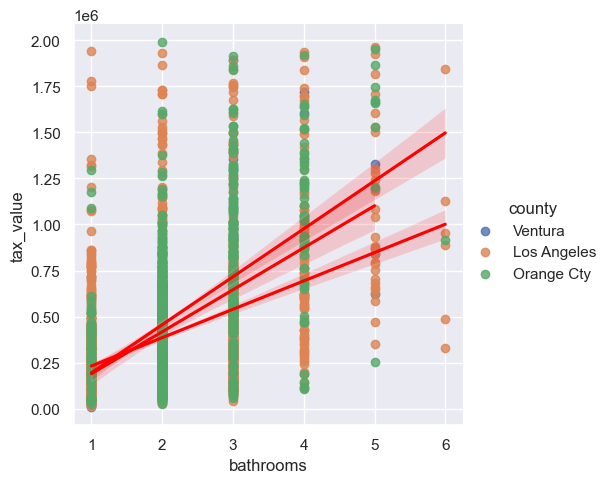

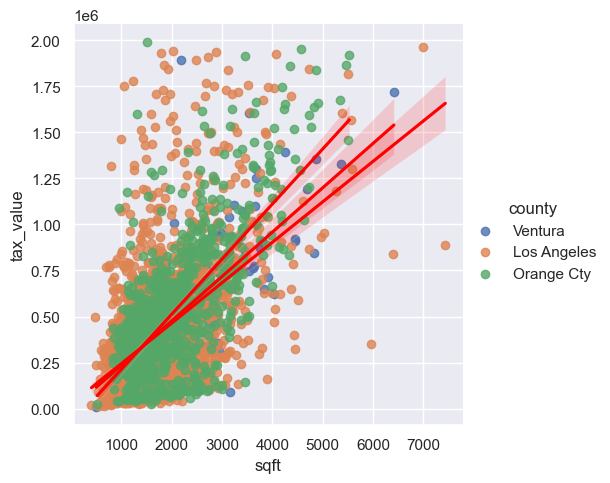

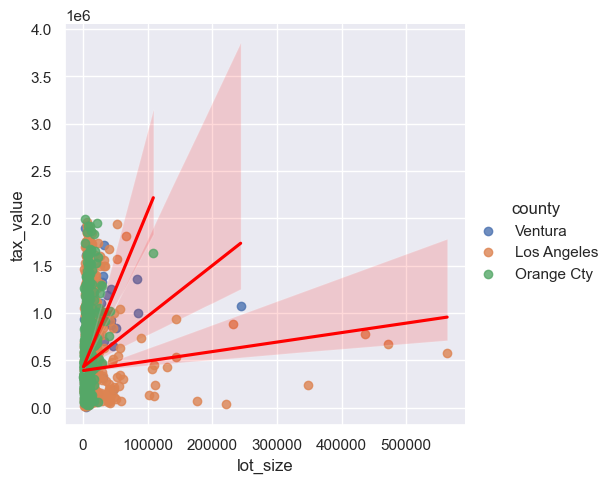

In [39]:
#3017 is apprx 10% of training data 
def plot_variable_pairs():
    train_sample = train.sample(n=3017)
    features = ['bedrooms', 'bathrooms', 'sqft', 'lot_size']
    for feature in features:
        sns.lmplot(x=feature, y="tax_value", data=train_sample, hue='county', line_kws={'color': 'red'})
        
plot_variable_pairs()


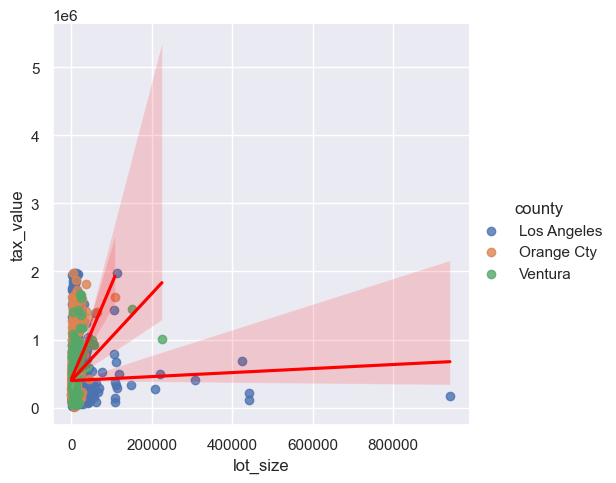

In [40]:
def plot_lot_pairs():
    train_sample = train.sample(n=3017)
    
    sns.lmplot(x='lot_size', y='tax_value', data=train_sample, hue= 'county', line_kws={'color': 'red'})

plot_lot_pairs()  

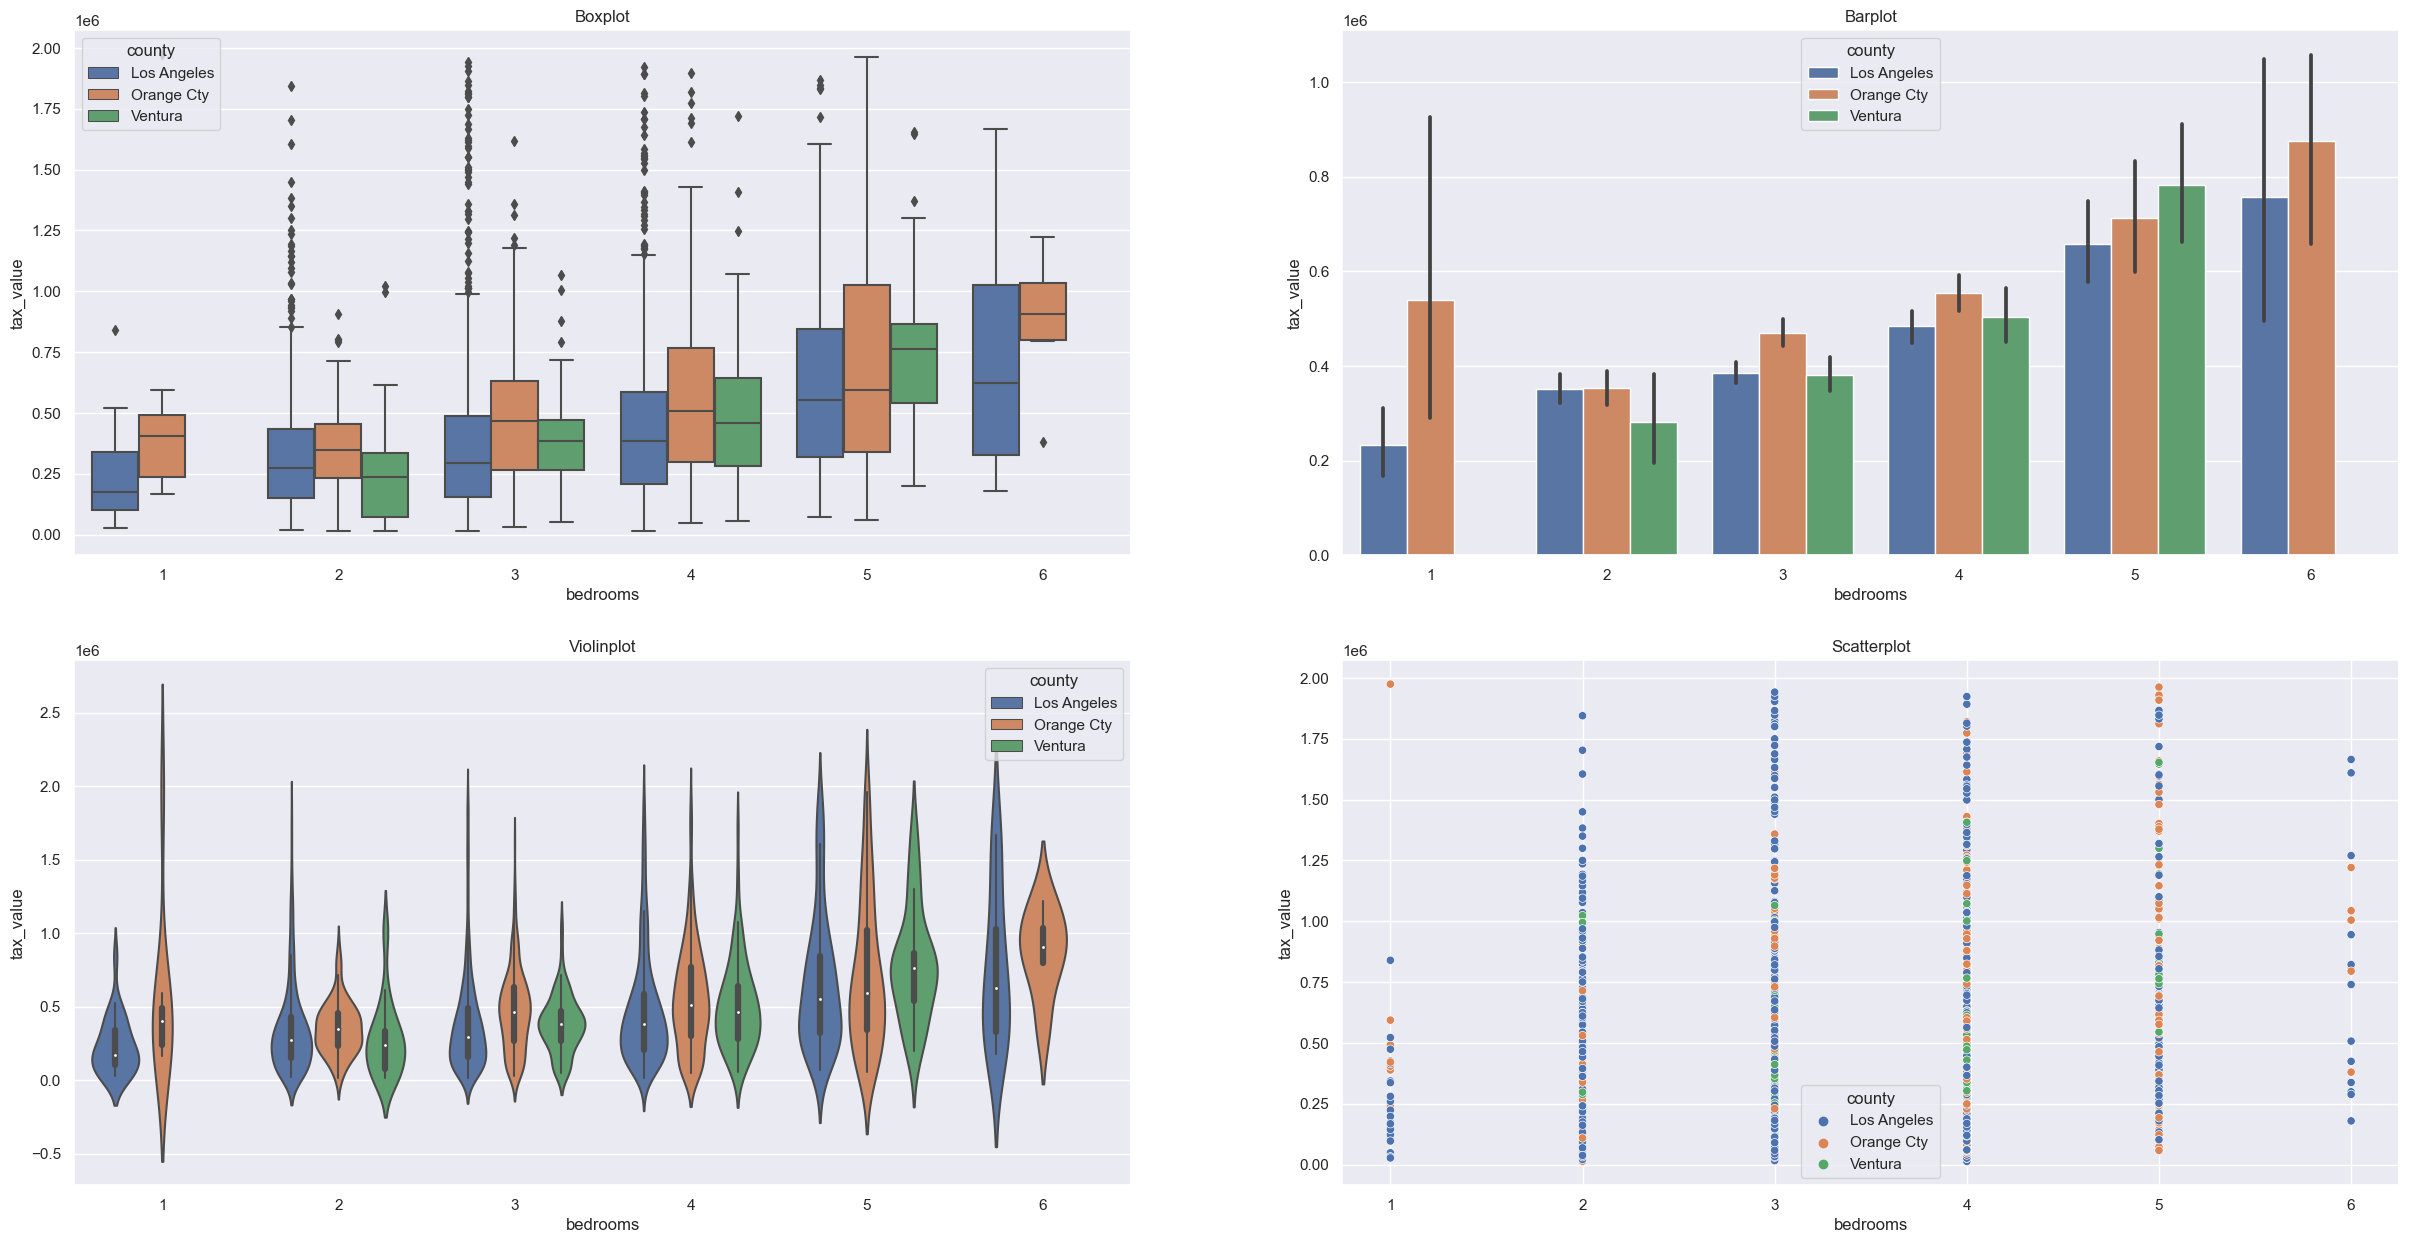

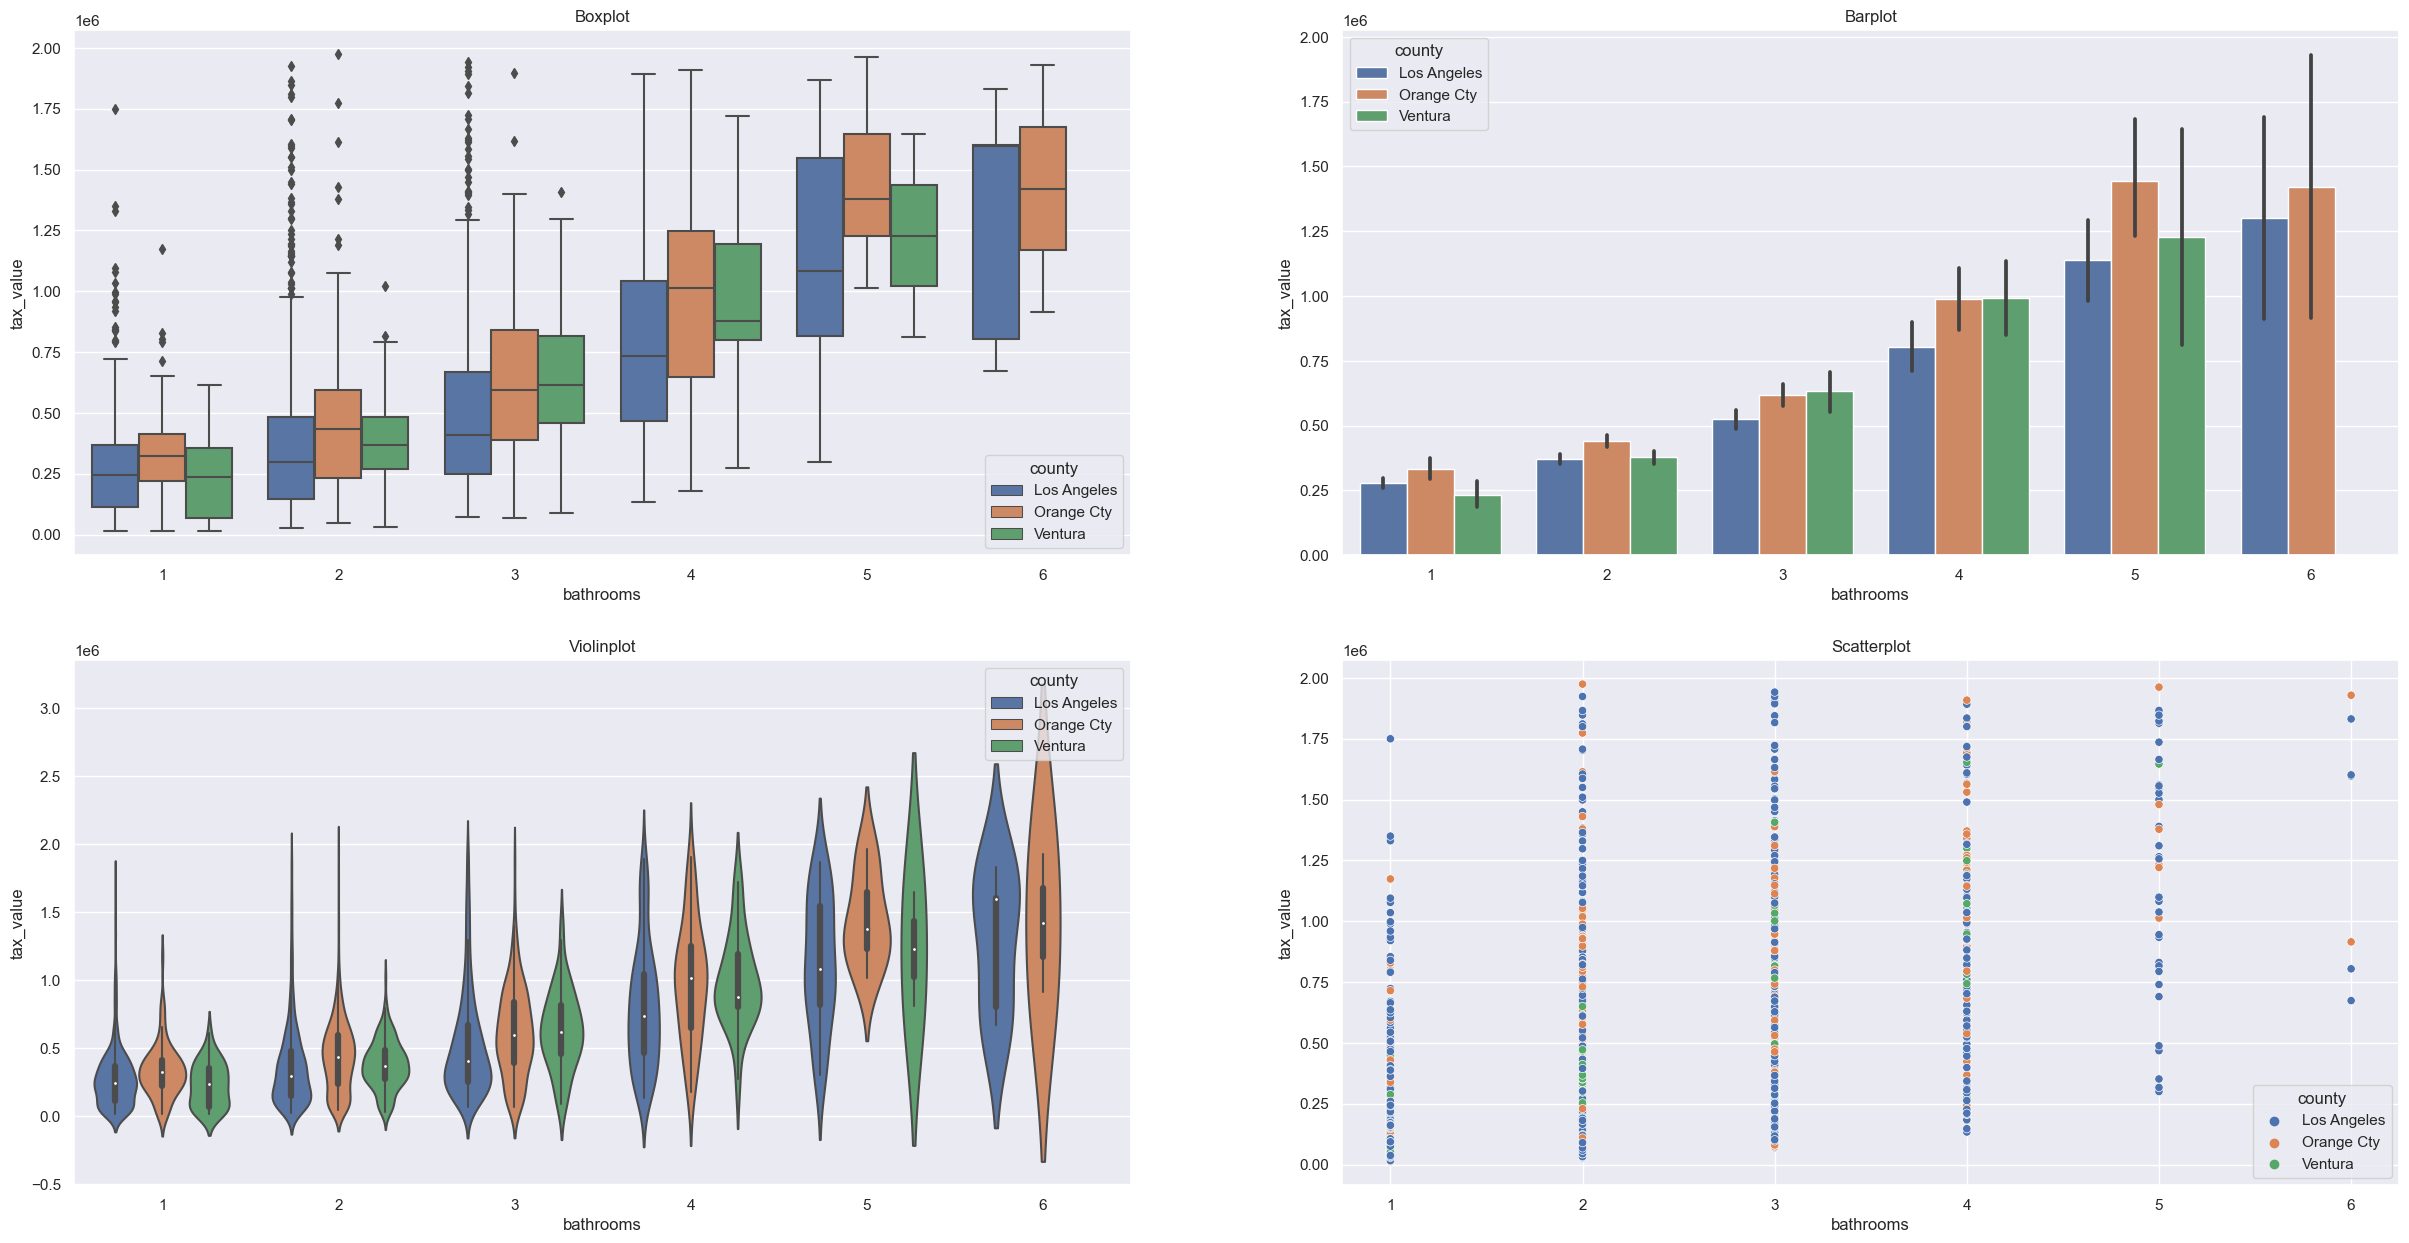

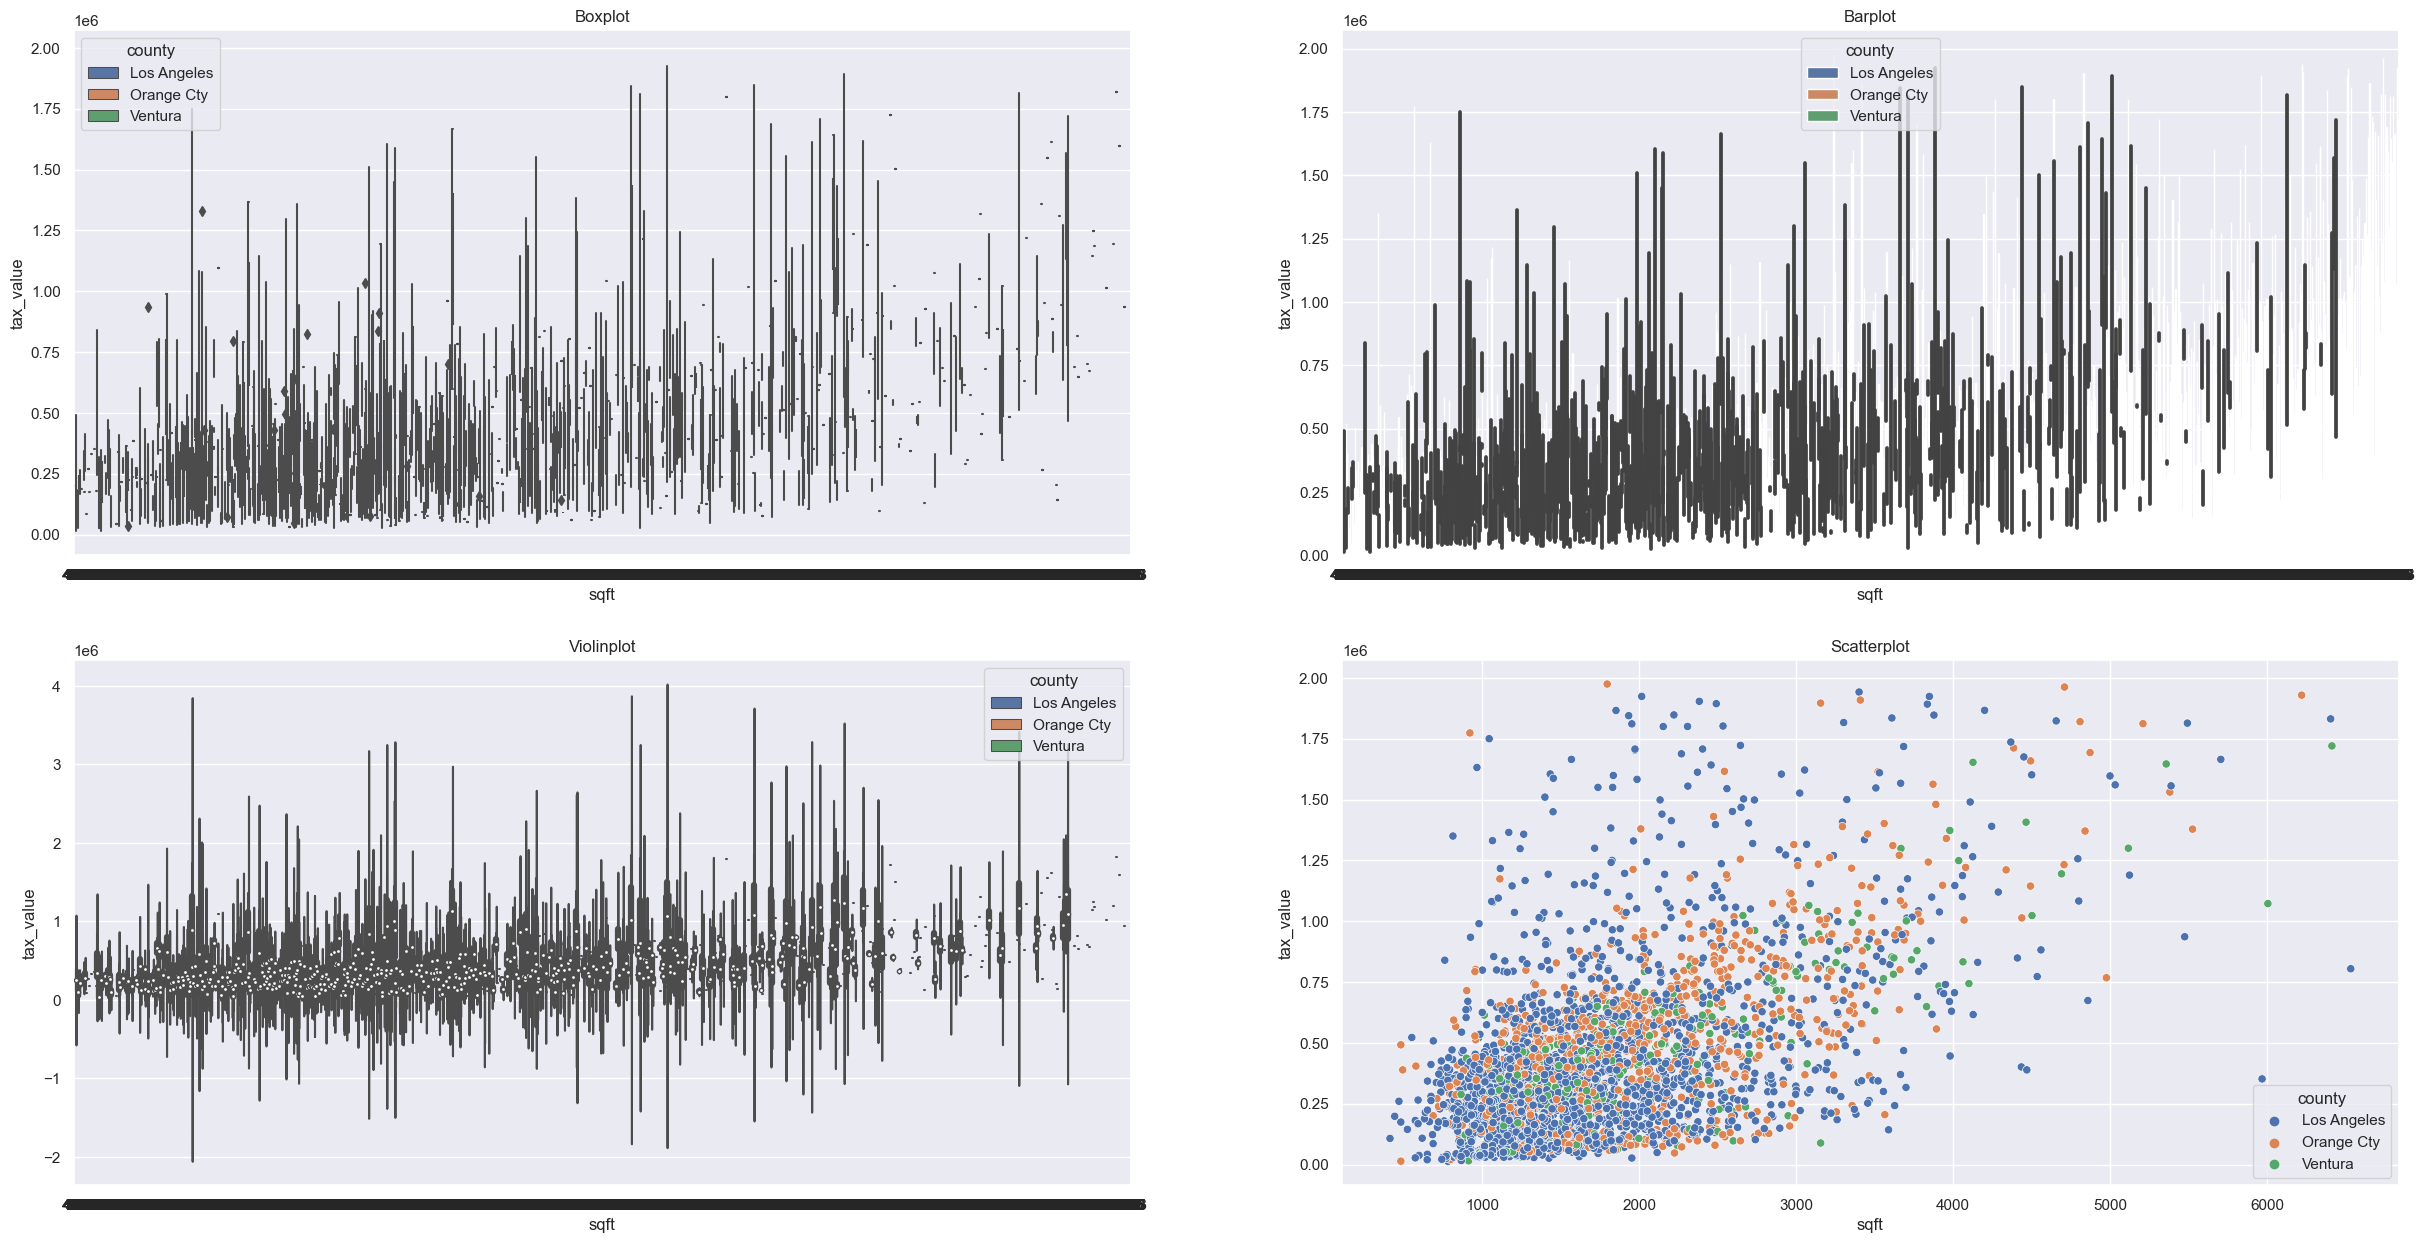

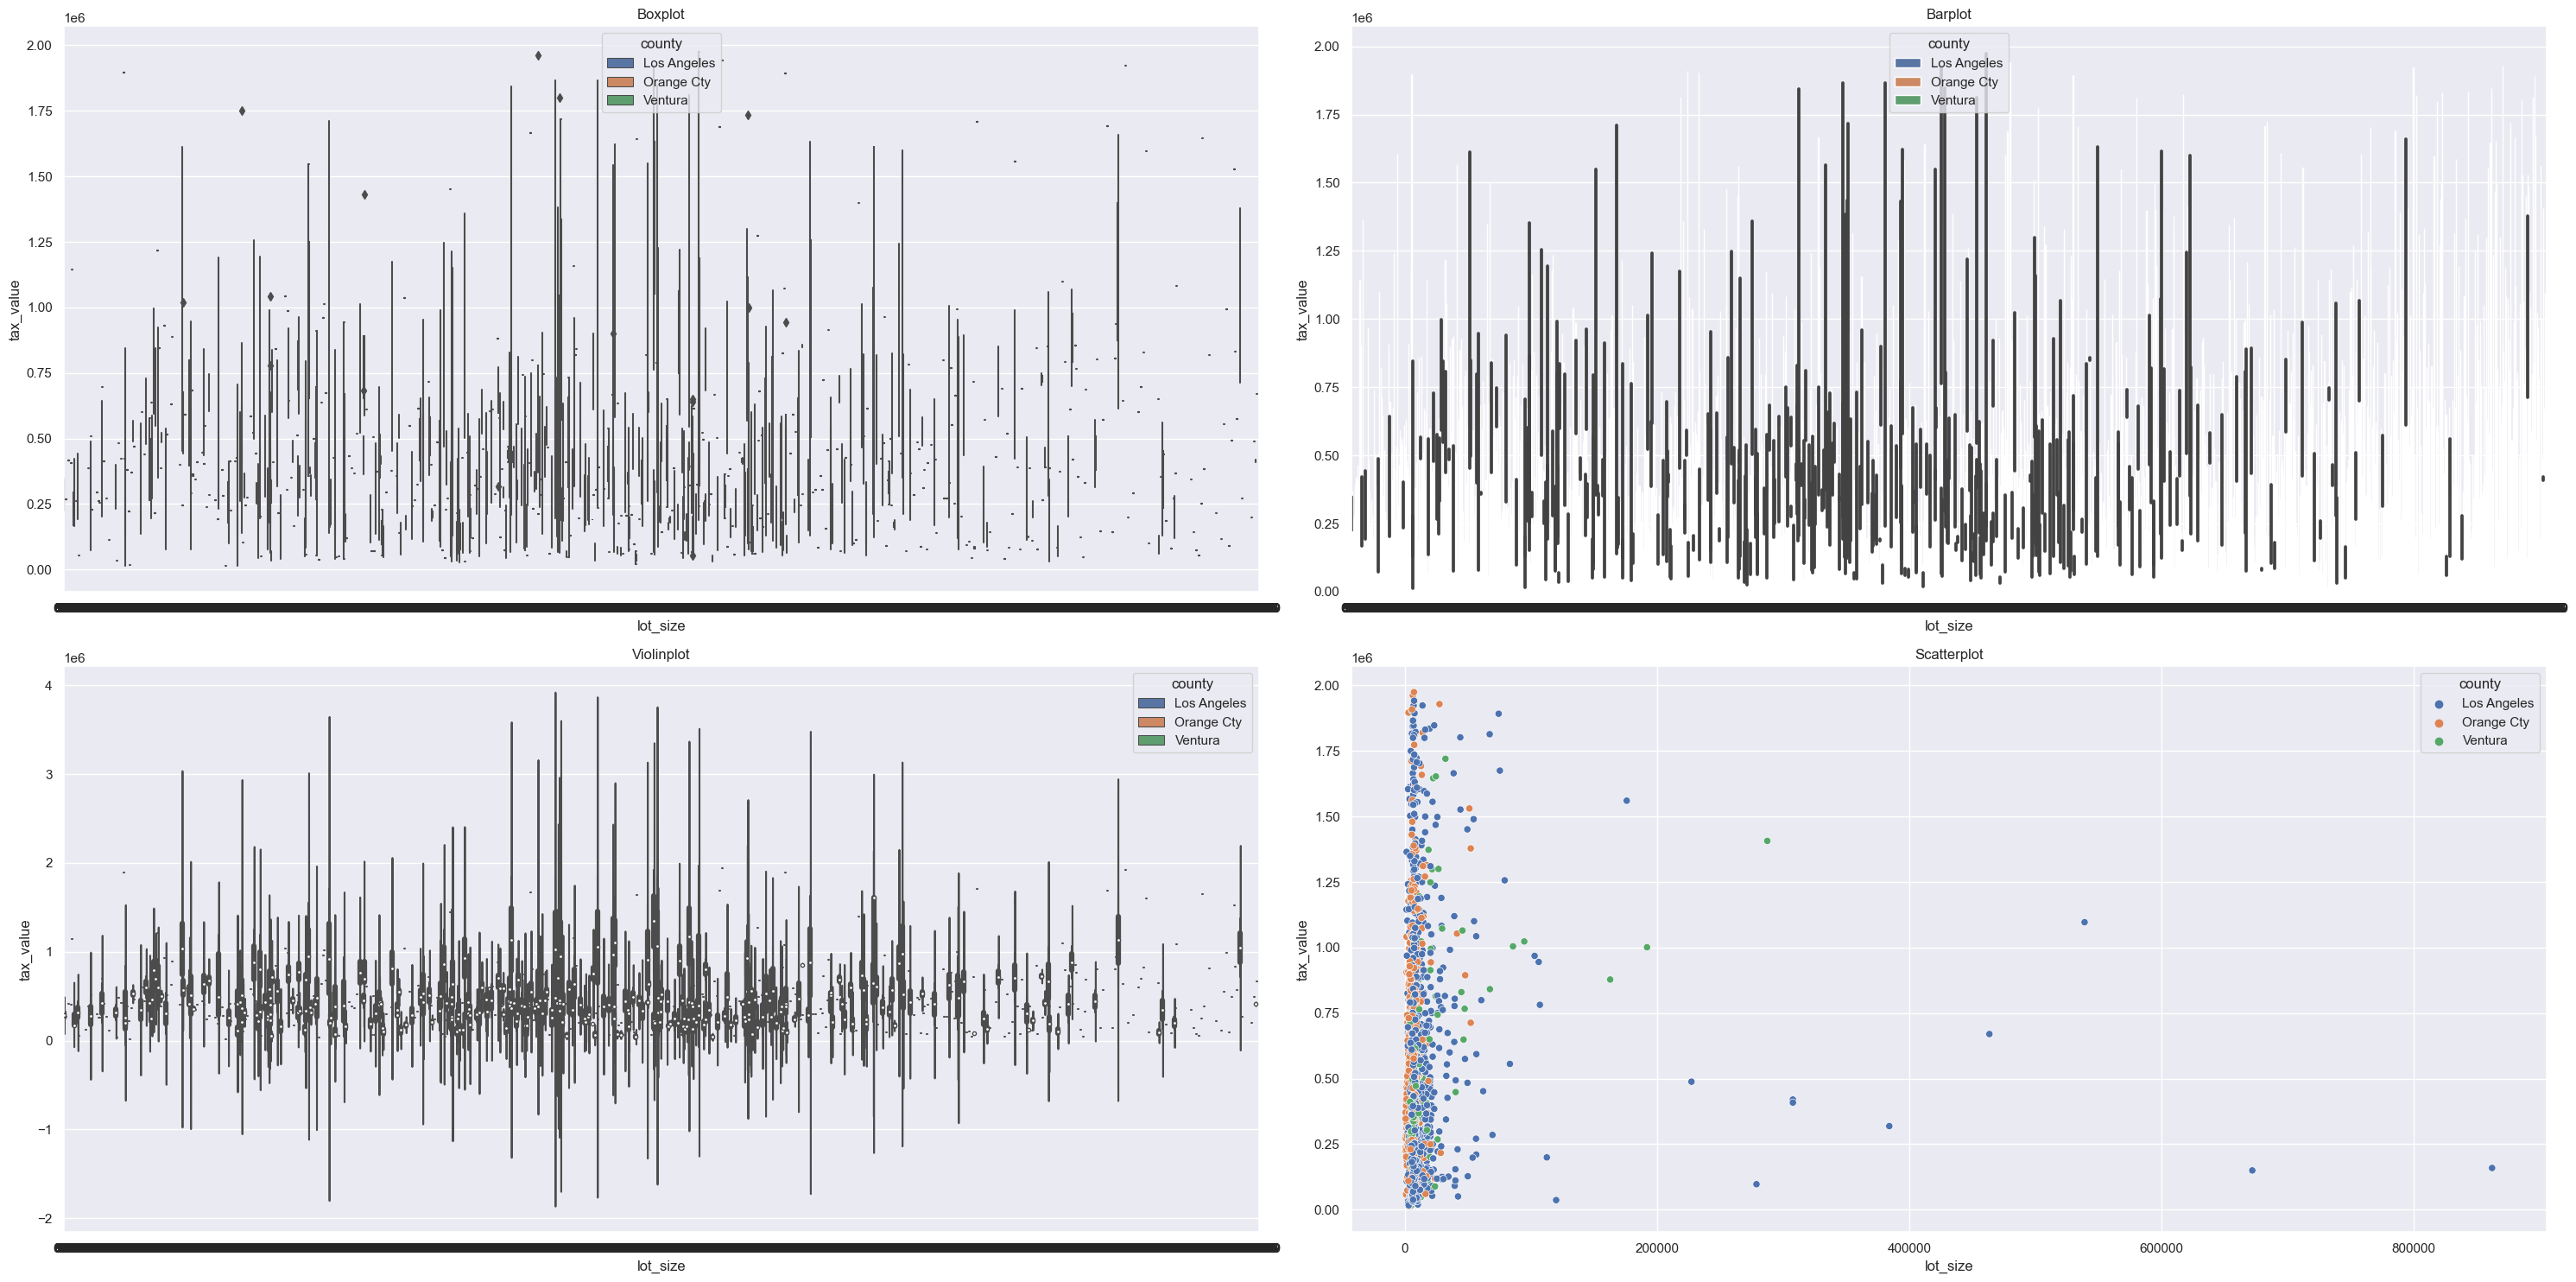

In [41]:
def plot_categorical_and_continuous_vars():
    train_sample = train.sample(n=3017)
    features = ['bedrooms', 'bathrooms', 'sqft', 'lot_size']
    
    for feature in features:
        sns.set(rc={'figure.figsize': (30, 15)})
        fig, axes = plt.subplots(2, 2)
        
        sns.boxplot(x=feature, y="tax_value", data=train_sample, hue='county', ax=axes[0, 0])
        axes[0, 0].set_title('Boxplot')
        
        sns.barplot(x=feature, y="tax_value", data=train_sample, hue='county', ax=axes[0, 1])
        axes[0, 1].set_title('Barplot')
        
        sns.violinplot(x=feature, y="tax_value", data=train_sample, hue='county', ax=axes[1, 0])
        axes[1, 0].set_title('Violinplot')
        
        sns.scatterplot(x=feature, y="tax_value", data=train_sample, hue='county', ax=axes[1, 1])
        axes[1, 1].set_title('Scatterplot')
        
    plt.tight_layout()

plot_categorical_and_continuous_vars()


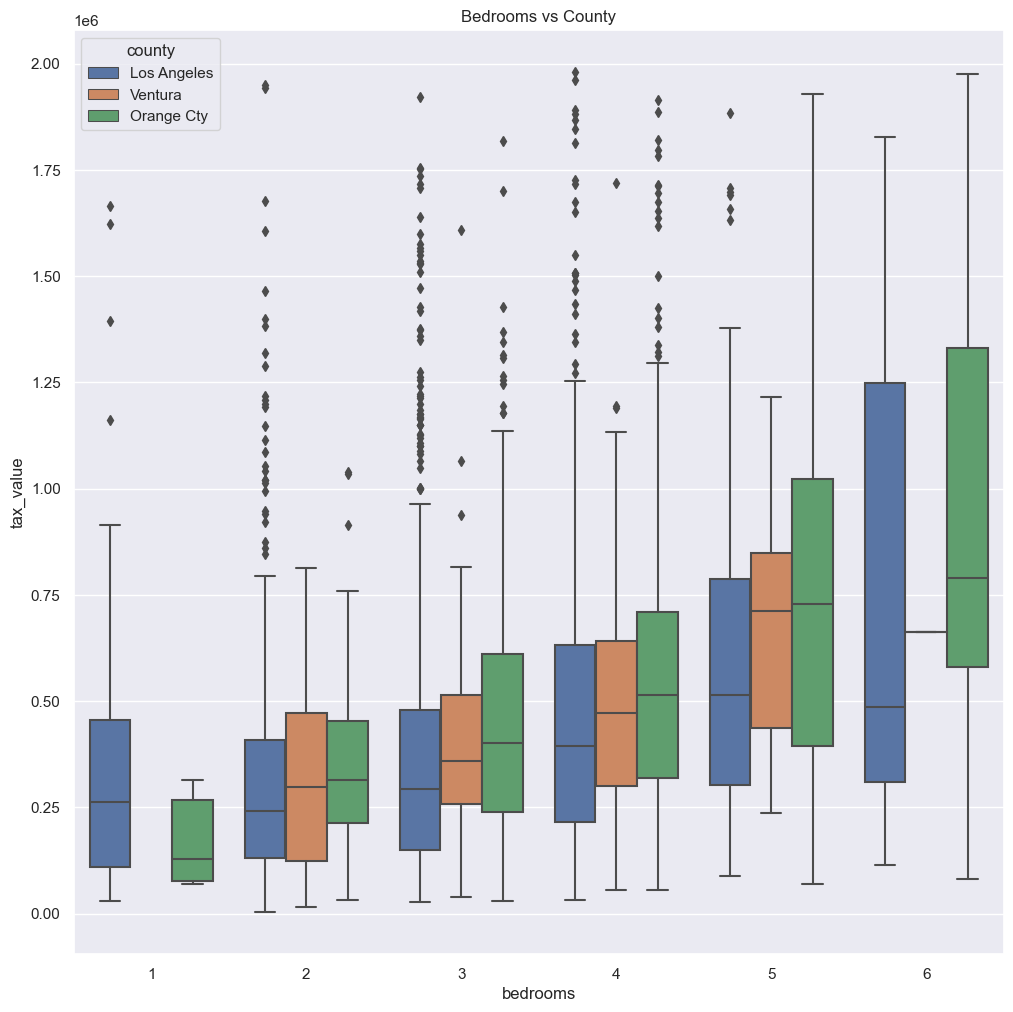

In [42]:
#Will use for final 
def bed_in_box():
    train_sample = train.sample(n=3017)
    features = ['bedrooms']
    
    for feature in features:
        sns.set(rc={'figure.figsize': (12, 12)})
        
        sns.boxplot(x=feature, y="tax_value", data=train_sample, hue='county')
        plt.title('Bedrooms vs County')
bed_in_box()

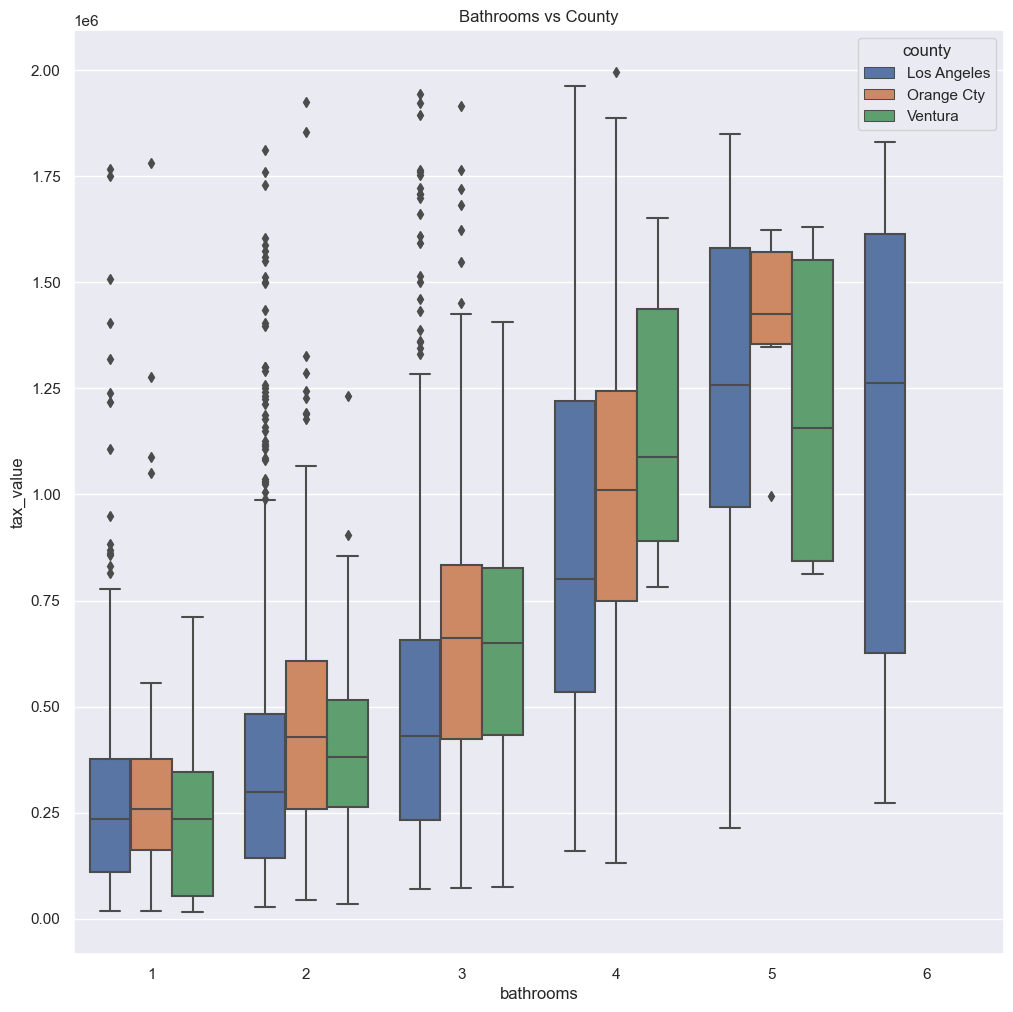

In [43]:
#Will use for final 
def bath_box():
    train_sample = train.sample(n=3017)
    features = ['bathrooms']
    
    for feature in features:
        sns.set(rc={'figure.figsize': (12, 12)})
        
        sns.boxplot(x=feature, y="tax_value", data=train_sample, hue='county')
        plt.title('Bathrooms vs County')
bath_box()

## QUESTIONS ANSWERED USING STATISTICAL TESTING 

In [44]:
alpha = .05

In [45]:
#Bathrooms stat
from scipy.stats import pearsonr, spearmanr
def bath_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = pearsonr(train.bathrooms, train.tax_value)
    validate_r, validate_p = pearsonr(validate.bathrooms, validate.tax_value)
    test_r, test_p = pearsonr(test.bathrooms, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
bath_stat(train, validate, test)

train_r: 0.4745570274140469
train_p: 0.0
validate_r: 0.4856142672063031
validate_p: 0.0
The p-value is less than the alpha: True
Outcome: We reject the null


In [46]:
#Sqft stat
def sqft_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = spearmanr(train.sqft, train.tax_value)
    validate_r, validate_p = spearmanr(validate.sqft, validate.tax_value)
    test_r, test_p = spearmanr(test.sqft, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print('test_r:', test_r)
    print('test_p:', test_p)
    print(f'The p-value is less than the alpha: {test_p < alpha}')
    if test_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
sqft_stat(train, validate, test)

train_r: 0.49419918004592495
train_p: 0.0
validate_r: 0.49902037452225506
validate_p: 0.0
test_r: 0.4948076674975013
test_p: 0.0
The p-value is less than the alpha: True
Outcome: We reject the null


In [47]:
#Bedrooms stat
def bedrooms_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = pearsonr(train.bedrooms, train.tax_value)
    validate_r, validate_p = pearsonr(validate.bedrooms, validate.tax_value)
    test_r, test_p = pearsonr(test.bedrooms, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
bedrooms_stat(train, validate, test)

train_r: 0.2699128998891122
train_p: 0.0
validate_r: 0.27962186340959655
validate_p: 4.922614657529989e-180
The p-value is less than the alpha: True
Outcome: We reject the null


In [48]:
#Lot_Size Stats
def lot_stat(train, validate, test):
    alpha = 0.05
    train_r, train_p = spearmanr(train.lot_size, train.tax_value)
    validate_r, validate_p = spearmanr(validate.lot_size, validate.tax_value)
    test_r, test_p = spearmanr(test.lot_size, test.tax_value)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print('test_r:', test_r)
    print('test_p:', test_p)
    print(f'The p-value is less than the alpha: {test_p < alpha}')
    if test_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
lot_stat(train, validate, test)

train_r: 0.11645097145550867
train_p: 1.427256484064407e-91
validate_r: 0.12435119508212768
validate_p: 5.98391137954606e-36
test_r: 0.1334695513970168
test_p: 3.363276715835308e-41
The p-value is less than the alpha: True
Outcome: We reject the null


## SCALING PERFORMED

In [49]:
to_scale = ['bedrooms', 'bathrooms', 'sqft', 'lot_size']

In [50]:
type(to_scale)

list

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

def visualize_scaler(scaler, df, features_to_scale, bins=50):
    #create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(12, 12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins)
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count')
        ax2.hist(df[feature], bins=bins)
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()



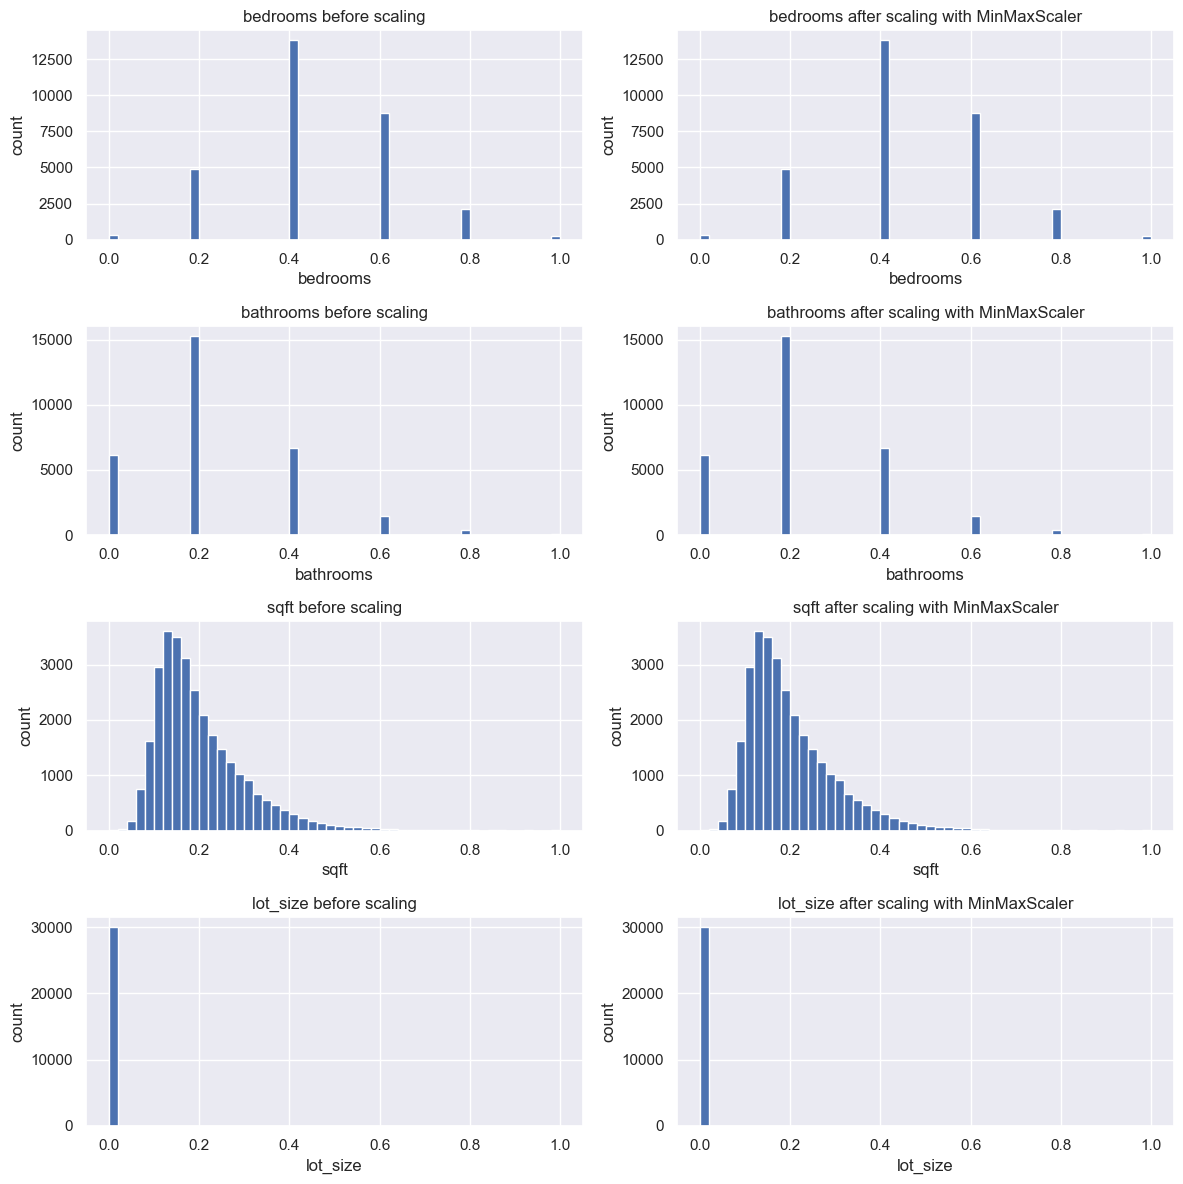

In [52]:
# call function with minmax
# train_sample = df.sample(n=3017)
mm_scaler = MinMaxScaler()
visualize_scaler(scaler=mm_scaler, df=train, features_to_scale=to_scale, bins=50)


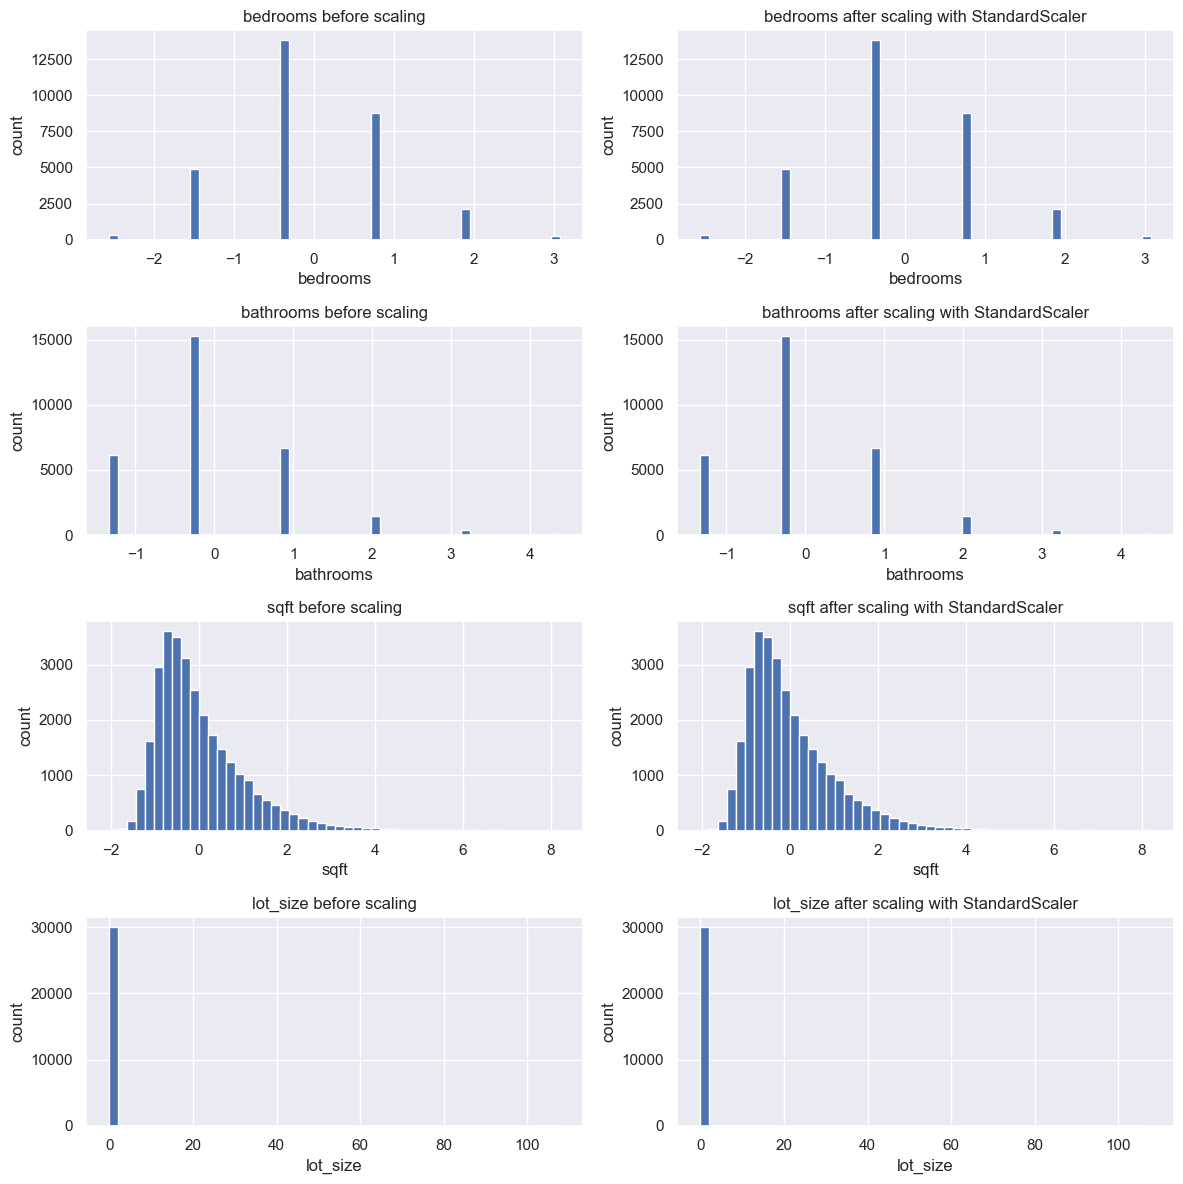

In [53]:
# call function with standardsca
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=train, features_to_scale=to_scale, bins=50)

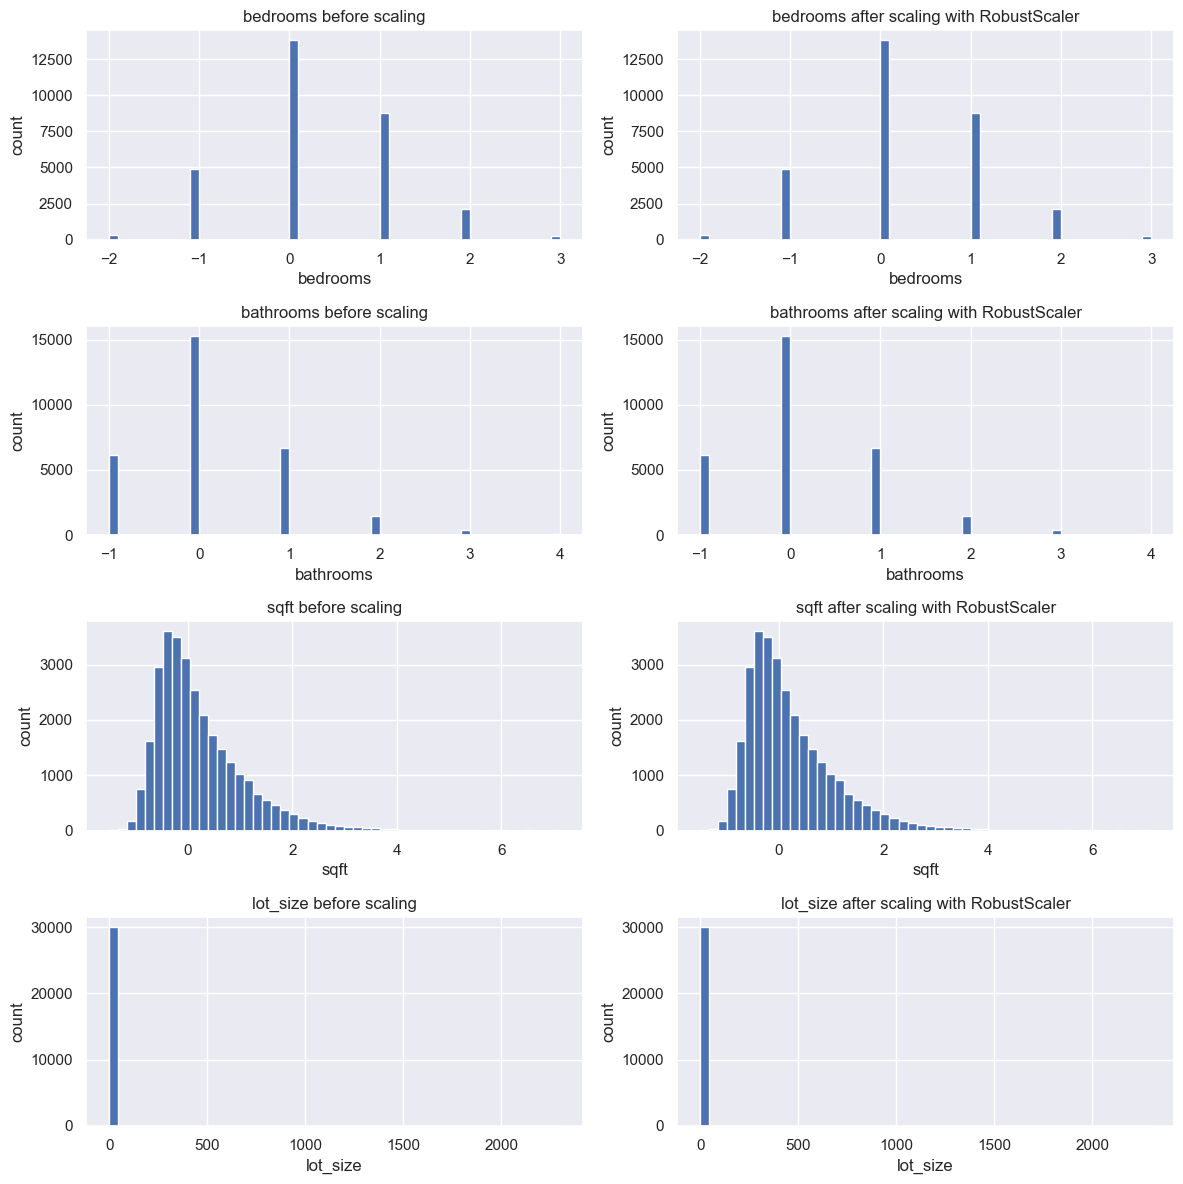

In [54]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=train, features_to_scale=to_scale, bins=50)

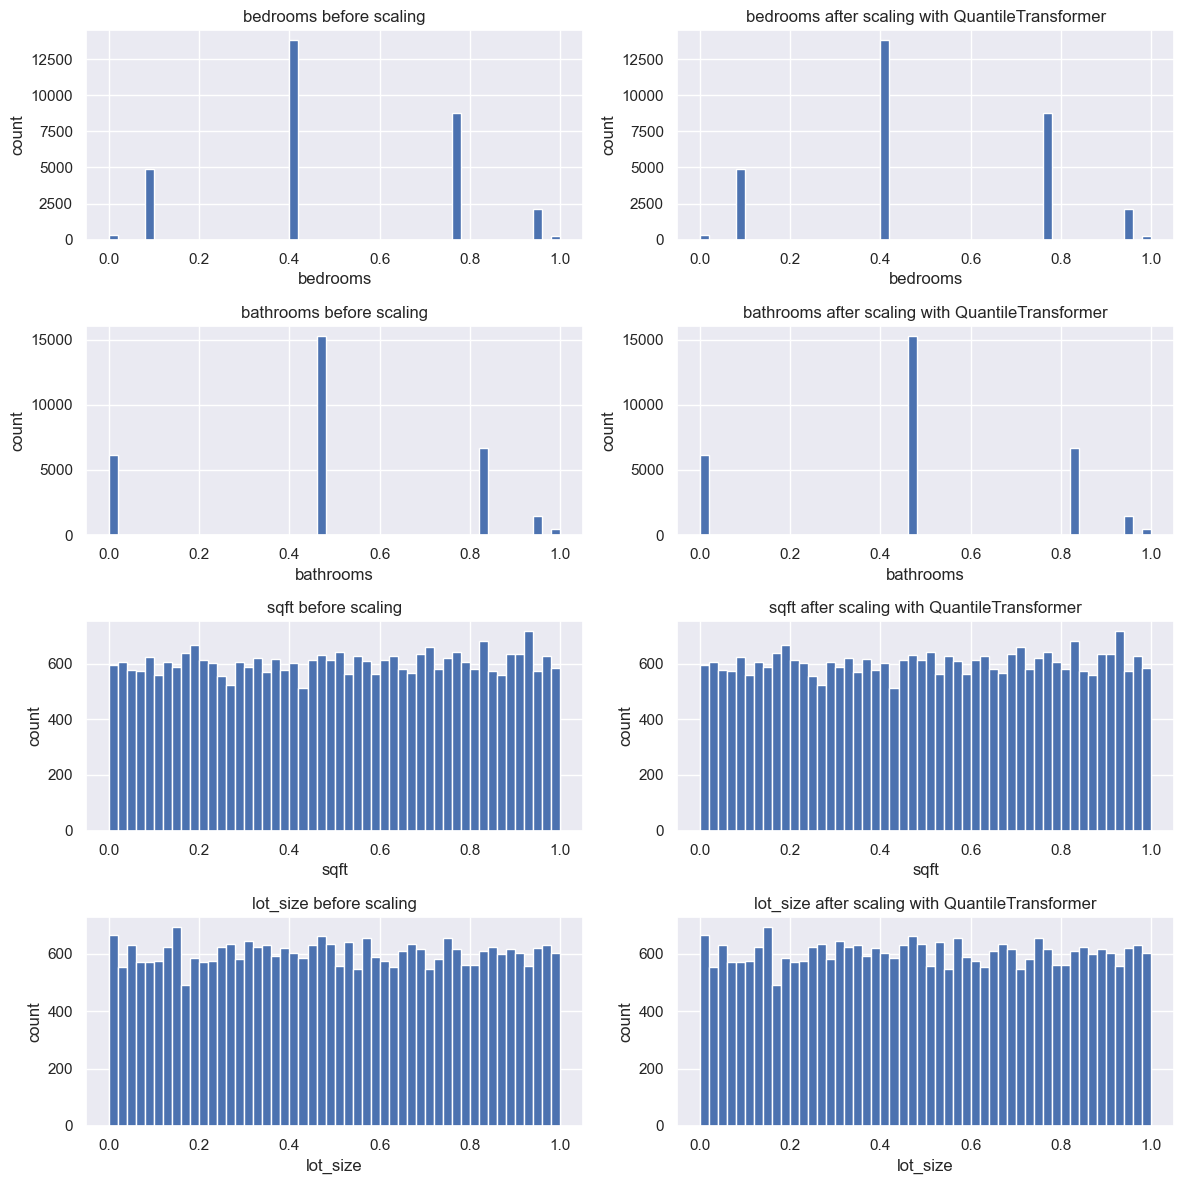

In [55]:
# call function using QuantileTransformer

qt_scaler = QuantileTransformer()
visualize_scaler(scaler=qt_scaler, df=train, features_to_scale=to_scale, bins=50)


In [56]:
# def bath_bar_stacked():
#     train_sample = train.sample(n=3017)

#     # Visualizing bathrooms by county
#     bath = sns.countplot(data=train_sample, x='bathrooms', hue='county', palette ="Set3")
    
#     # Access the legend object
#     legend = bath.legend()
    
#     bath.set_xlabel('Bathrooms')
#     bath.set_ylabel('Count')
#     plt.title('Bathrooms vs Tax Value')
    
#     # Add count numbers on bars
#     for p in bath.patches:
#         width = p.get_width()
#         height = p.get_height()
#         x, y = p.get_xy()
#         count = int(height)  # Get the count value
#         offset = width * 0.02  # Adjust the offset percentage as needed
#         bath.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

#     plt.show()


In [57]:
def bath_bar():    
    train_sample = train.sample(n=3017)

    
    # Visualizing bathrooms by county
    bath = sns.countplot(data=train_sample, x='bathrooms', hue='county')
    
    # Access the legend object
    legend = bath.legend()
    
    bath.set_xlabel('Bathrooms')
    bath.set_ylabel('Tax Value')
    plt.title('Bathrooms vs Tax Value')
                          
     # Add count numbers on bars
    for p in bath.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        count = int(height)  # Get the count value
        offset = width * 0.02  # Adjust the offset percentage as needed
        bath.annotate(format(count, ',d'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()


### TAKEAWAYS
Bedrooms and Bathrooms sqft were scaled with normal distrubution 

## MODELING 

In [58]:
# removing counties because they are strings can concat later to readd
def save_county(train, validate, test):
    train_county = train.county
    validate_county = validate.county
    test_county = test.county
    return train_county, validate_county, test_county

In [59]:
print(train.columns)
print(validate.columns)
print(test.columns)

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'county',
       'lot_size', 'longitude', 'latitude'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'county',
       'lot_size', 'longitude', 'latitude'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'county',
       'lot_size', 'longitude', 'latitude'],
      dtype='object')


In [60]:
X_train, y_train, X_validate, y_validate, X_test, y_test = w.x_y_split(train, validate, test)

In [61]:
X_train.head()

bedrooms  bathrooms      sqft year_built  lot_size  longitude  latitude
2178   0.772272   0.000000  0.822952       1953  0.995012 -118169467  34635282
37565  0.772272   0.000000  0.284923       1944  0.240240 -118138053  33866686
48602  0.772272   0.958458  0.968900       1999  0.903565 -118966992  34158979
41120  0.401401   0.461461  0.317443       1928  0.133133 -118364216  34142966
35722  0.401401   0.461461  0.361361       1941  0.510844 -118120842  33983891

In [62]:
print(f"""Train shape: {X_train.shape}
Validate shape: {X_validate.shape}
Test shape: {X_test.shape}
""")


Train shape: (30169, 7)
Validate shape: (10057, 7)
Test shape: (10057, 7)



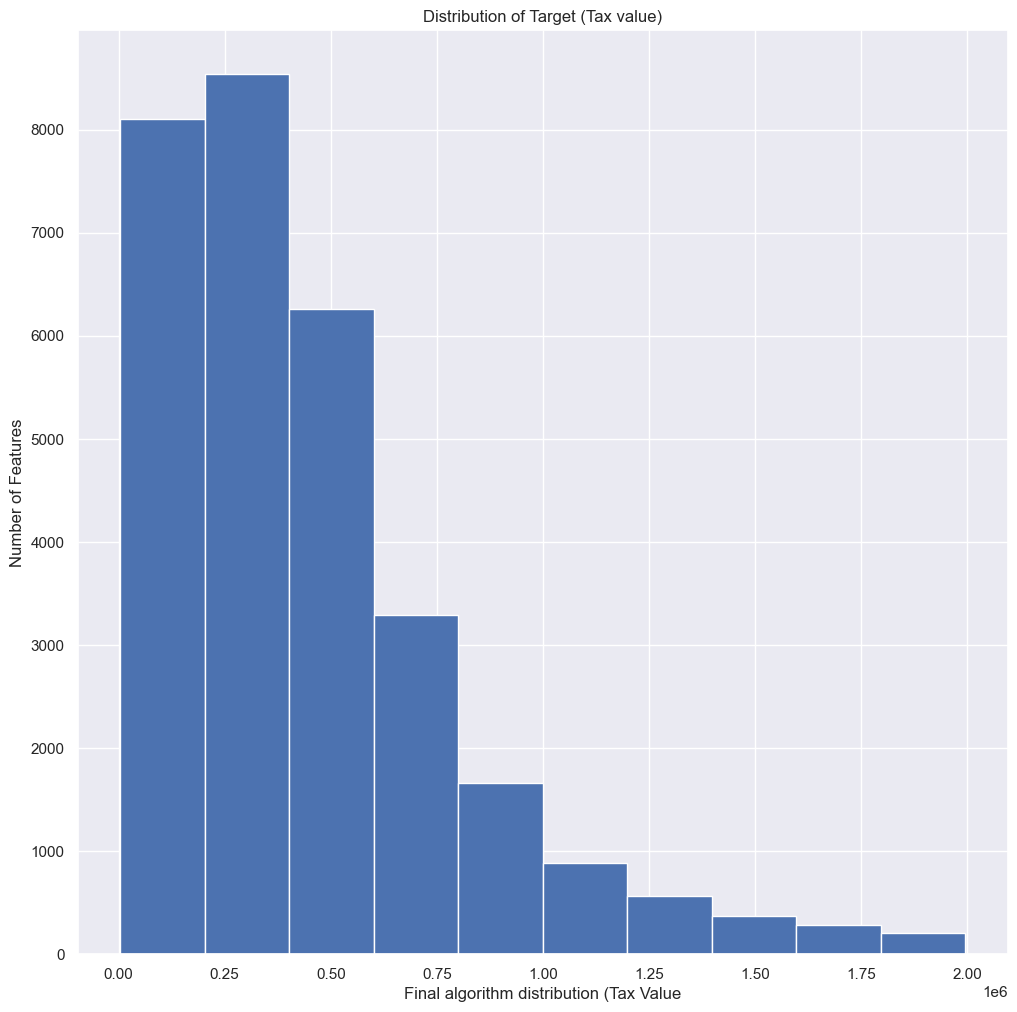

In [63]:
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

#use power 3

plt.hist(y_train)
plt.title("Distribution of Target (Tax value)")
plt.xlabel("Final algorithm distribution (Tax Value")
plt.ylabel("Number of Features")
plt.show()

Inverse distribution 

In [64]:
y_train.mean()

444410.23812522786

In [65]:
y_train.median()

364079.0

In [66]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [67]:
# 1. Predict tax_value_pred_mean  make columns for train and validate
tax_value_pred_mean = y_train.tax_value.mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean



In [68]:
# 2. compute tax_value_pred_median and make columns for train and validate
tax_value_pred_median = y_train.tax_value.median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

In [69]:
# 3. RMSE of tax_value_pred_mean
rmse_train_mu = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean) ** (.5)
rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean) ** (.5)

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")


RMSE using Mean
Train/In-Sample: 352910.71 
Validate/Out-of-Sample: 356860.97


In [70]:
# 4. RMSE of tax_value_pred_median
rmse_train_med = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median) **(.5)
rmse_validate_med = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median) **(.5)

print(f"""RMSE using Median\nTrain/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")


RMSE using Median
Train/In-Sample: 361937.95 
Validate/Out-of-Sample: 365180.38


In [71]:
y_train.head()

tax_value  tax_value_pred_mean  tax_value_pred_median
2178      338176        444410.238125               364079.0
37565      66016        444410.238125               364079.0
48602    1158000        444410.238125               364079.0
41120     564482        444410.238125               364079.0
35722     405145        444410.238125               364079.0

In [72]:
# metrics in a df to later compare
# def metric(df)
metric_df = pd.DataFrame(data = [
        {
            "model": "mean_baseline",
            "RMSE_train": rmse_train_mu,
            "RMSE_validate":rmse_validate_mu,
            "R2_validate": explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_mean)
        }
])


In [73]:
metric_df

model     RMSE_train  RMSE_validate  R2_validate
0  mean_baseline  352910.709119  356860.966132          0.0

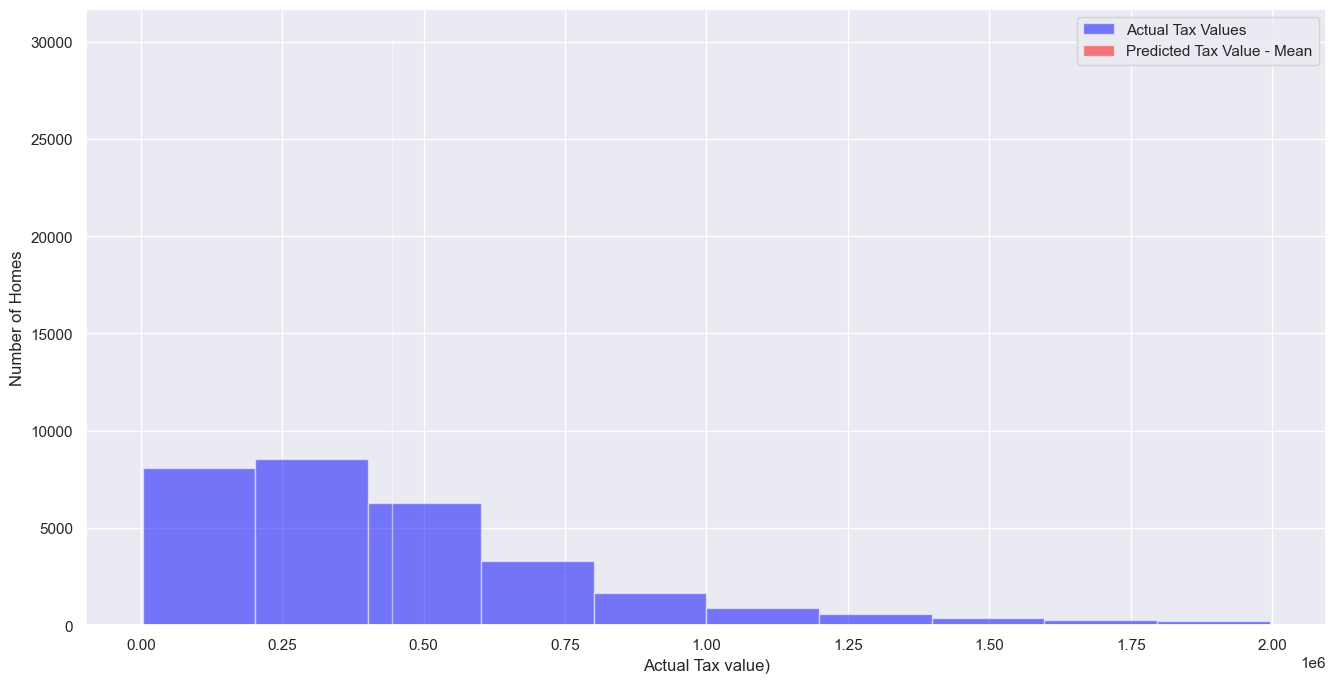

In [74]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_train.tax_value, color='blue', alpha=0.5, label="Actual Tax Values")
plt.hist(y_train.tax_value_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Tax Value - Mean")
#plt.hist(y_train.tax_value_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Final Grades - Median")a

plt.xlabel("Actual Tax value)")
plt.ylabel("Number of Homes")
plt.legend()
plt.show()


# # Assuming you have a DataFrame 'telco_train' with the required data
# new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
# x = ['Without Device Protection', 'With Device Protection']

# # Visualizing the streaming TV vs churn
# dp = sns.countplot(data=telco_train, x='device_protection_Yes', hue='churn_Yes', palette='Blues')

# # Access the legend object
# legend = dp.legend()

# # Modify the legend labels
# legend.get_texts()[0].set_text(new_labels['not churn'])
# legend.get_texts()[1].set_text(new_labels['churned'])

# plt.xticks(range(len(x)), x)

# dp.set_xlabel('TELCO Customers:')
# dp.set_ylabel('Customer Count')
# plt.title('Device Protection vs Churn')

# # Add count numbers on bars
# for p in dp.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy()    
#     offset = width * 0.02  # Adjust the offset percentage as needed
#     dp.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# plt.show()

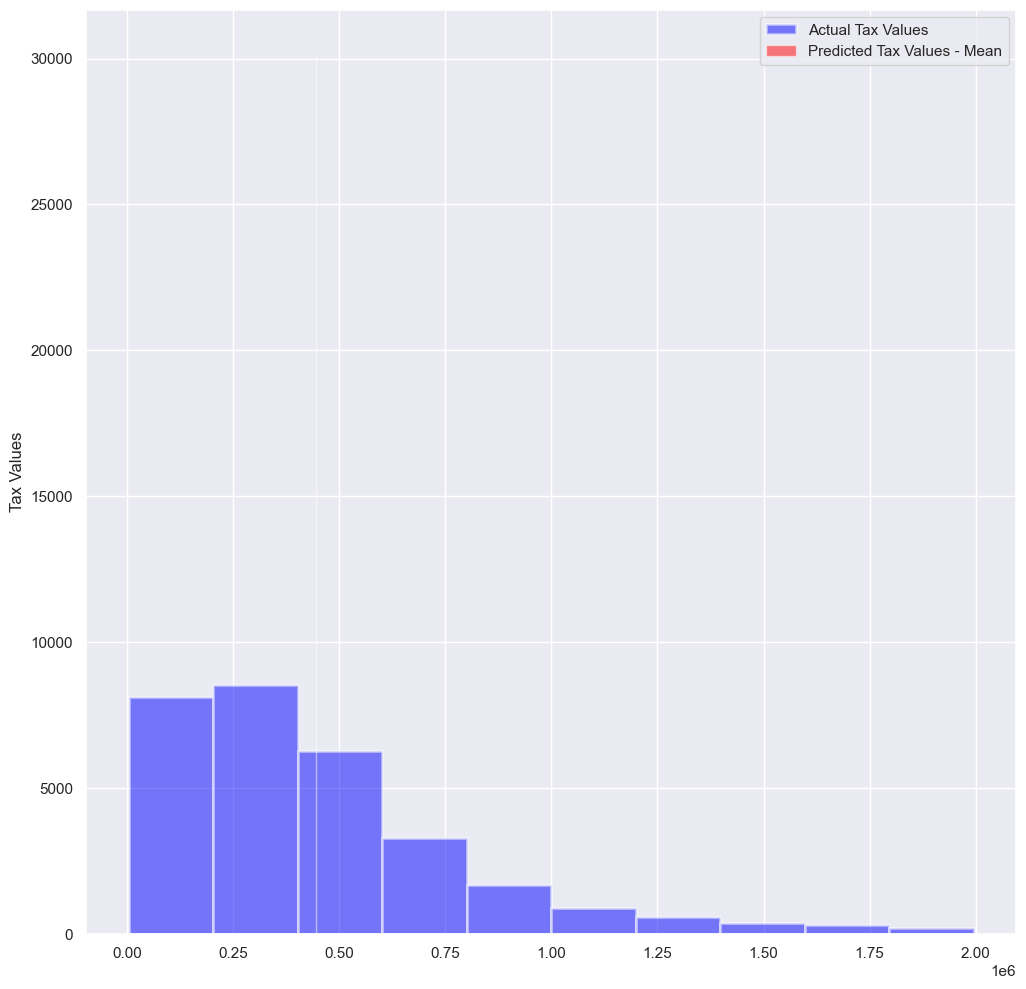

In [75]:
import matplotlib.pyplot as plt

plt.hist(x= y_train.tax_value, color='blue', alpha=0.5, label="Actual Tax Values", linewidth=2)
plt.hist(x = y_train.tax_value_pred_mean,  bins=10, color='red', alpha=0.5, label="Predicted Tax Values - Mean", stacked=True)
# plt.hist(y_train.tax_value_pred_median,bins=10, density=True ,color='orange', alpha=0.5, label="Predicted Tax Values - Median", stacked=True)
# plt.xlabel("Data Points")
plt.ylabel("Tax Values")
plt.legend()
plt.show()



(array([30169.]),
 array([364078.5, 364079.5]),
 <BarContainer object of 1 artists>)

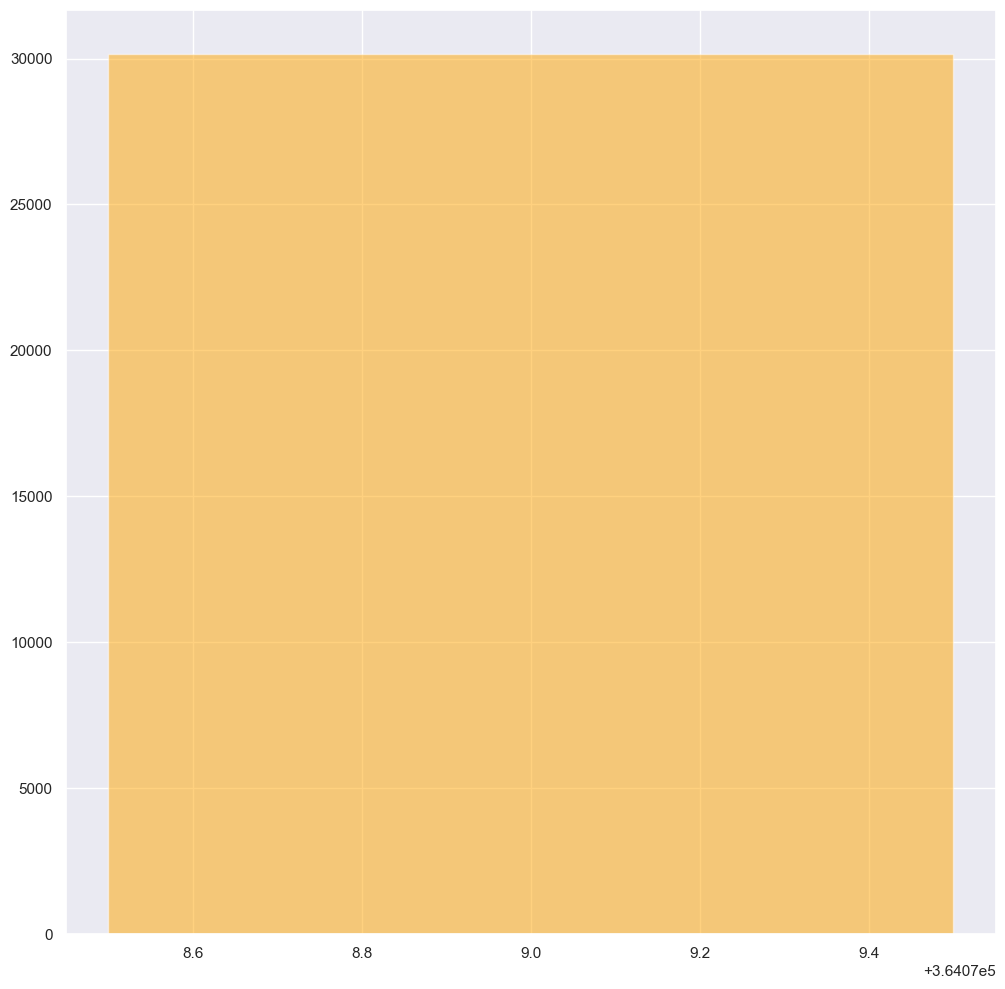

In [76]:
plt.hist(y_train.tax_value_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Final Grades - Median")

In [77]:
y_train.head()

tax_value  tax_value_pred_mean  tax_value_pred_median
2178      338176        444410.238125               364079.0
37565      66016        444410.238125               364079.0
48602    1158000        444410.238125               364079.0
41120     564482        444410.238125               364079.0
35722     405145        444410.238125               364079.0

### Linear Regression (OLS)

In [78]:
y_train.head()

tax_value  tax_value_pred_mean  tax_value_pred_median
2178      338176        444410.238125               364079.0
37565      66016        444410.238125               364079.0
48602    1158000        444410.238125               364079.0
41120     564482        444410.238125               364079.0
35722     405145        444410.238125               364079.0

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the model object
lr = LinearRegression()

# Fit the model to training data
OLSmodel = lr.fit(X_train, y_train.tax_value)

# Make a prediction
y_train["tax_value_pred_lr"] = lr.predict(X_train)

# Evaluate: RMSE
ols_rmse_train = mean_squared_error(y_train.tax_value, y_train["tax_value_pred_lr"]) ** 0.5

#Predict Validate
y_validate["tax_value_pred_lr"] = lr.predict(X_validate)

# evaluate: RMSE
ols_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lr) ** (1/2)

print(f"""RMSE for OLS
_____________________
Training/In-Sample: {ols_rmse_train}, 
Validation/Out-of-Sample:  {ols_rmse_validate}
Difference:  {ols_rmse_validate - ols_rmse_train}""")


RMSE for OLS
_____________________
Training/In-Sample: 292817.2252168366, 
Validation/Out-of-Sample:  7972535200.035133
Difference:  7972242382.8099165


In [80]:
#Append
metric_df = metric_df.append({
    "model":"OLS",
    "RMSE_train": ols_rmse_train,
    "RMSE_validate": ols_rmse_validate,
    "R2_validate": explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lr)
}, ignore_index=True)

In [81]:
metric_df

model     RMSE_train  RMSE_validate   R2_validate
0  mean_baseline  352910.709119   3.568610e+05  0.000000e+00
1            OLS  292817.225217   7.972535e+09 -4.774235e+08

### LASSO + LARS

In [82]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=0.3)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tax_value)

#2. USE THE THING: make a prediction
y_train['tax_value_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
lars_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_validate["tax_value_pred_lars"] = lars.predict(X_validate)

# evaluate: RMSE
lars_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {lars_rmse_train}, 
Validation/Out-of-Sample:  {lars_rmse_validate}
Difference:  {lars_rmse_validate - lars_rmse_train}""")


RMSE for Lasso + Lars
_____________________
Training/In-Sample: 292817.22523091326, 
Validation/Out-of-Sample:  7972123987.225808
Difference:  7971831170.000577


In [83]:
lars.coef_

array([-1.58885270e+05,  1.53669955e+05,  5.41887530e+05,  3.10942448e+02,
        5.56570067e+04, -1.66394399e-01, -3.72816010e-01])

In [84]:
lars.intercept_


-7443054.296808599

In [85]:
#Append
metric_df = metric_df.append({
    "model":"lassoLars_alpha.01",
    "RMSE_train": lars_rmse_train,
    "RMSE_validate": lars_rmse_validate,
    "R2_validate": explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lars)
}, ignore_index=True)

In [86]:
metric_df

model     RMSE_train  RMSE_validate   R2_validate
0       mean_baseline  352910.709119   3.568610e+05  0.000000e+00
1                 OLS  292817.225217   7.972535e+09 -4.774235e+08
2  lassoLars_alpha.01  292817.225231   7.972124e+09 -4.773733e+08

## Tweedie Regressor

In [87]:
# 1. FIT THE THING: fit the model to training data
glm = TweedieRegressor(power=3, alpha=0)

# 2. USE THE THING: make a prediction
 
glm.fit(X_train, y_train.tax_value)

# 3. Evaluate: RMSE
y_train['tax_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
tweedie_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)
# # 4. REPEAT STEPS 2-3

# predict validate
# evaluate: RMSE
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
tweedie_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=3 & alpha=0\nTraining/In-Sample: ", tweedie_rmse_train, 
      "\nValidation/Out-of-Sample: ", tweedie_rmse_validate)


RMSE for GLM using Tweedie, power=3 & alpha=0
Training/In-Sample:  352910.70911936916 
Validation/Out-of-Sample:  356860.96613174444


In [88]:
#Append
metric_df = metric_df.append({
    "model":"tweeedie_alpha.03",
    "RMSE_train": tweedie_rmse_train,
    "RMSE_validate": tweedie_rmse_validate,
    "R2_validate": explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_glm)
}, ignore_index=True)

In [89]:
metric_df

model     RMSE_train  RMSE_validate   R2_validate
0       mean_baseline  352910.709119   3.568610e+05  0.000000e+00
1                 OLS  292817.225217   7.972535e+09 -4.774235e+08
2  lassoLars_alpha.01  292817.225231   7.972124e+09 -4.773733e+08
3   tweeedie_alpha.03  352910.709119   3.568610e+05  0.000000e+00

## Polynomials

In [90]:
#1. Create the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2) #Quadratic aka x-squared

#2. Fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

#3. Transform X_validate_scaled & X_test_scaled 
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)


#2.1 MAKE THE THING: create the model object
poly = LinearRegression()

#2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
poly.fit(X_train_degree2, y_train.tax_value)

#3. USE THE THING: predict train
y_train['tax_value_pred_poly'] = poly.predict(X_train_degree2)

#4. Evaluate: rmse
poly_rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_poly) ** .5

#5. REPEAT STEPS 3-4

# predict validate
y_validate['tax_value_pred_poly'] = poly.predict(X_validate_degree2)

# evaluate: rmse
poly_rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_poly) ** .5

print(f"""RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  {poly_rmse_train} 
Validation/Out-of-Sample:  {poly_rmse_validate}""")

RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  632192.7236450879 
Validation/Out-of-Sample:  1.77623543530485e+17


In [91]:
#Append
metric_df = metric_df.append({
    "model":"poly_alpha.2",
    "RMSE_train": poly_rmse_train,
    "RMSE_validate": poly_rmse_validate,
    "R2_validate": explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_poly)
}, ignore_index=True)

### EVALUATE 

In [92]:
metric_df

model     RMSE_train  RMSE_validate   R2_validate
0       mean_baseline  352910.709119   3.568610e+05  0.000000e+00
1                 OLS  292817.225217   7.972535e+09 -4.774235e+08
2  lassoLars_alpha.01  292817.225231   7.972124e+09 -4.773733e+08
3   tweeedie_alpha.03  352910.709119   3.568610e+05  0.000000e+00
4        poly_alpha.2  632192.723645   1.776235e+17 -2.476568e+23

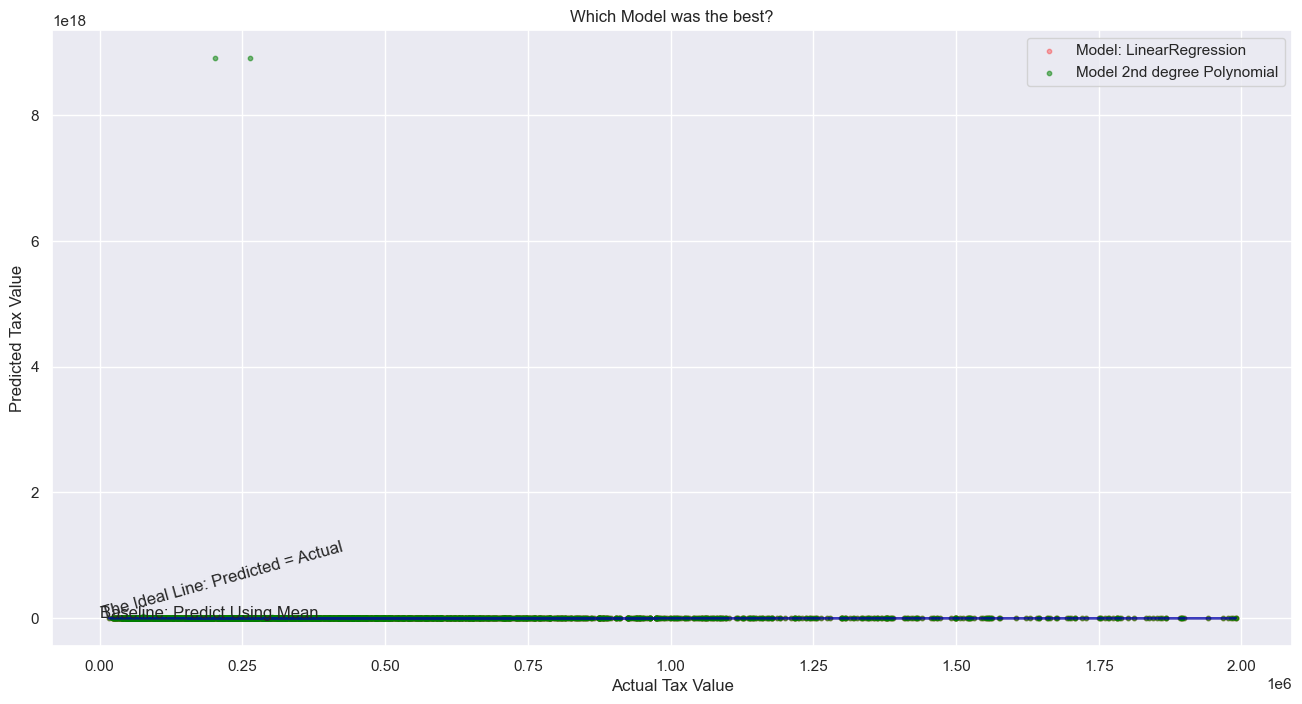

In [93]:
df_sample = y_validate.sample(n=3017)
plt.figure(figsize=(16,8))
#actual vs mean
plt.plot(df_sample.tax_value, df_sample.tax_value_pred_mean, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))

#actual vs. actual
plt.plot(df_sample.tax_value, df_sample.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

#actual vs. LinearReg model
plt.scatter(df_sample.tax_value, df_sample.tax_value_pred_lr, 
            alpha=0.3, color="red", s=10, label="Model: LinearRegression")
#actual vs. LassoLars model
# plt.scatter(df_sample.tax_value, df_sample.tax_value_pred_lars, 
#             alpha=0.3, color="purple", s=10, label="Model: Lasso Lars")
# #actual vs. Tweedie/GenLinModel
# plt.scatter(df_sample.tax_value, df_sample.tax_value_pred_glm, 
#             alpha=0.3, color="yellow", s=10, label="Model: TweedieRegressor")
# #actual vs. PolynomReg/Quadratic
plt.scatter(df_sample.tax_value, df_sample.tax_value_pred_poly, 
            alpha=0.5, color="green", s=10, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Which Model was the best?")
plt.show()

## Polynomial Regression was best Model unable to complete due time constraints switched to Lars+Lasso

In [94]:
# # Test best model


# y_test['tax_value_pred_poly'] = poly.predict(X_test_degree2)

In [95]:
# # evaluate: rmse
# poly_rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_poly) ** .5
# print(f"""RMSE for Polynomial Regression
# _____________________________________________      
# Out-of-Sample Performance: {poly_rmse_test}
# Baseline: {y_train.tax_value.mean()}""")

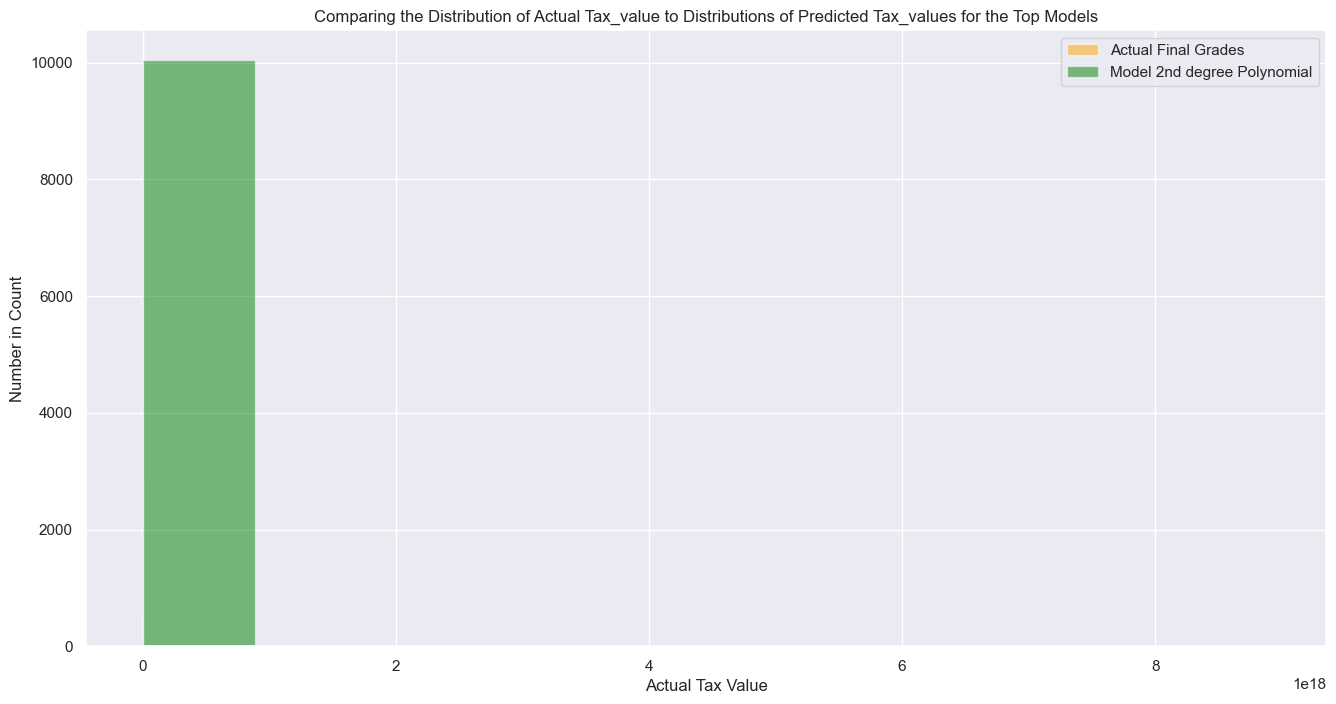

In [96]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.tax_value, color='orange', alpha=.5, label="Actual Final Grades")
#plt.hist(y_validate.tax_value_pred_lr, color='red', alpha=.5, label="Model: LinearRegression")
# plt.hist(y_validate.tax_value_pred_lars, color='purple', alpha=.5, label="Model: Lasso Lars")
#plt.hist(y_validate.tax_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.tax_value_pred_poly, color='green', alpha=.5, label="Model 2nd degree Polynomial")

plt.xlabel("Actual Tax Value")
plt.ylabel("Number in Count")
plt.title("Comparing the Distribution of Actual Tax_value to Distributions of Predicted Tax_values for the Top Models")
plt.legend()
plt.show()

### MODEL TAKEAWAYS
* The polynomial regression model performed the best in train, validate datasets with a train RMSE at 267254 and a validate RMSE at 272265 and better than baseline that had a RMSE train of 352910 RMSE validate of 356861. However, the polygram hitogram overlay to train dataset provides deeper insights into performance of the polynomial regression model. A symmetric, centered distribution suggests a good fit, while skewness or non-centered distribution indicates bias. Excessive fluctuations or outliers in the histogram may suggestthat the model may be overfit. 
### MODEL RECOMMENDATION
* Remove the IQR .25 data not just the outstanding outliers which were mainly in the IQR.75 when prepping the data to avoid underfitting

### MODEL RECOMMENDATION
* When preparing the data for modeling, it is advisable to remove the data points below the IQR (Interquartile Range) lower bound, which corresponds to the 25th percentile, rather than solely focusing on eliminating outstanding outliers. By doing so, you can avoid potential underfitting issues and ensure that the model captures a sufficient range of data points to make accurate predictions.




### MODEL SELECTION & Out-of-Sample EVALUATION
* Polynomial Regression selected 